<a href="https://colab.research.google.com/github/tunglinwood/Learning-Material/blob/main/PCPP1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 Working with RESTful APIs
After completing this course you will know:

* the basic concepts of network programming, REST, network sockets, and client-server communication;
* how to use and create sockets in Python, and how to establish and close the connection with a server;
* what JSON and XML files are, and how they can be used in network communication;
* what HTTP methods are, and how to say anything in HTTP;
* how to build a sample testing environment;
* what CRUD is;
* how to build a simple REST client, and how to fetch and remove data from server, add new data to it, and update the already-existing data.
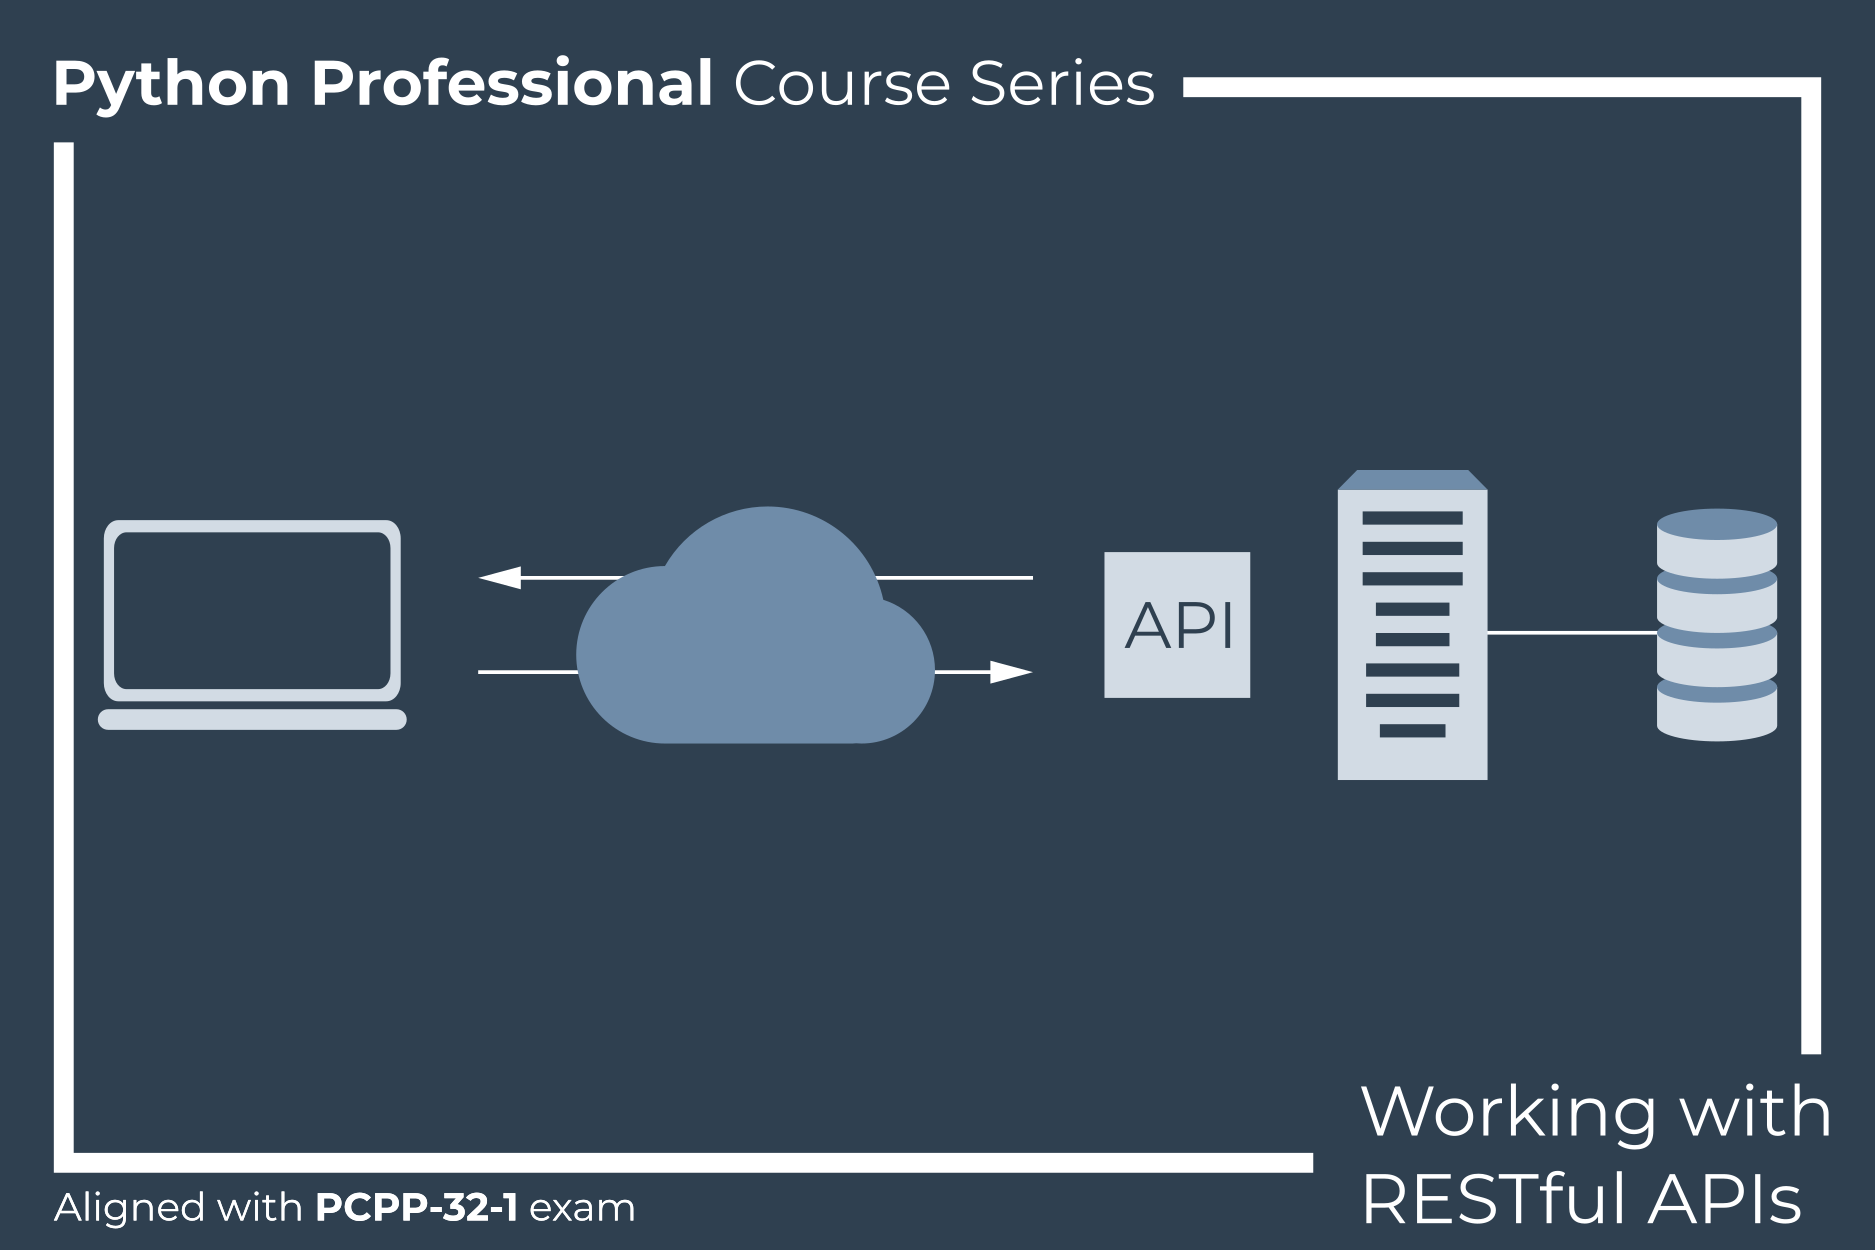

##Some words about REST
The word you see below may look a little enigmatic:


REST
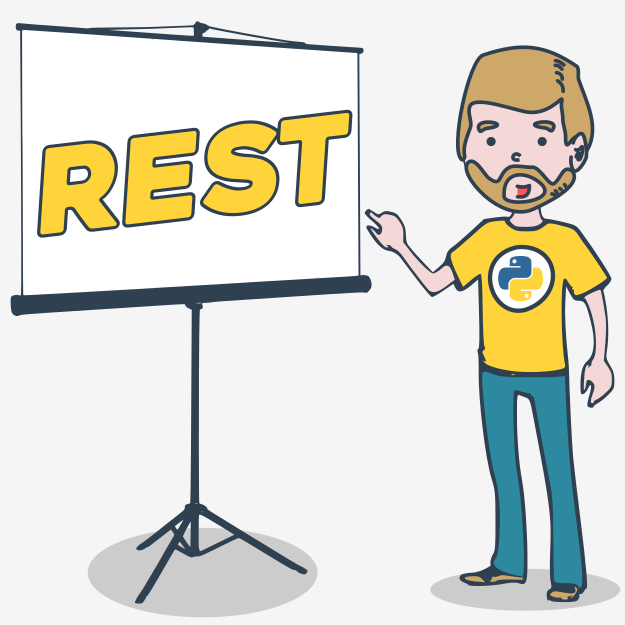
Are we going to convince you to take a rest? Not at all. On the contrary, we want to encourage you to start the next part of our adventure - very demanding and completely new. We'll show you not Python itself, but a very specific kind of machinery (do not take this literally) which drives lots of contemporary computer systems, especially those which work on the Internet; moreover, which cannot work without the Internet.

REST isn't actually a word - it's an acronym. It comes from three words of equal importance:

* **RE**presentational
* **S*tate
* **T**ransfer
Let's look at them separately.




##Representational

**RE** stands for Representational
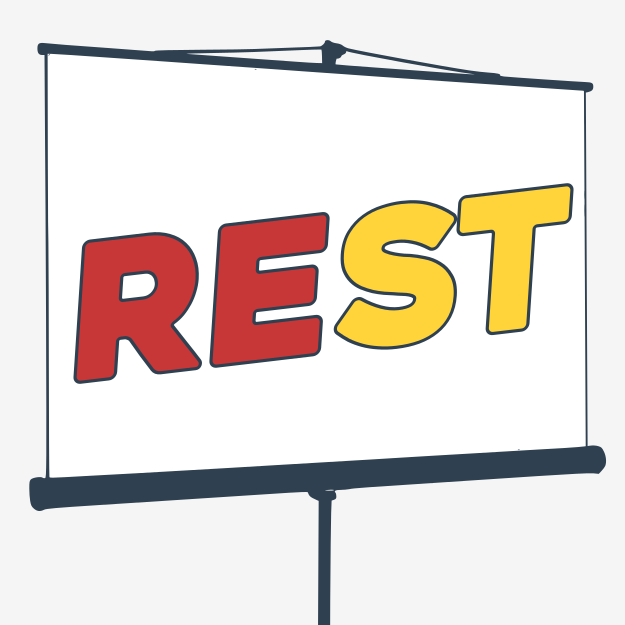
**RE** stands for Representational. It means that our machinery **stores, transmits and receives representations**, while the term representation reflects the way in which **data or states are retained inside the system and presented to the users** (humans or computers).

REST uses a very curious way of representing its data - it's always text. Pure, plain **text**.

"It must be a joke," you may think now. "How is it possible to send and receive all kinds of data using plain text?"

It's a very good question. Probably the best question that can be put now. REST is focused on a very specific kind of data - the data which reflects **states**.

We'll tell you more about this very shortly. Let's now make a jump to the next part of the acronym.


##State

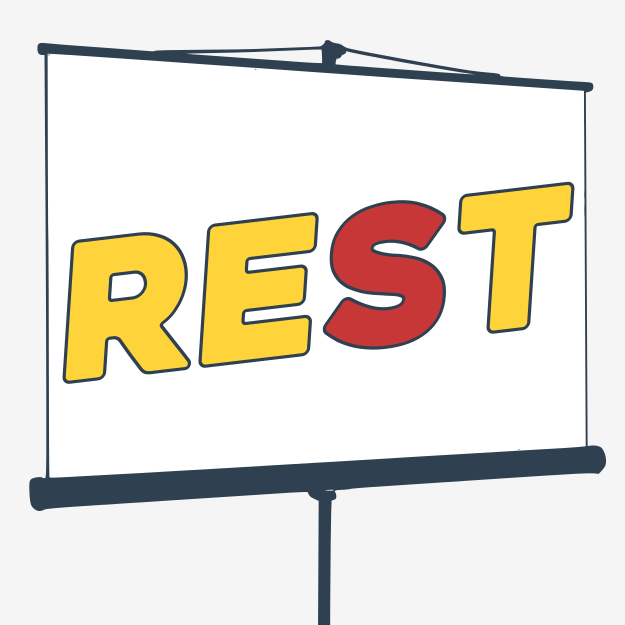
**S** stands for State. The word state is key to understanding what REST is and what it could be used for.

We think that your knowledge of classes and objects can be very helpful here. We want you to use it. Imagine any object. The object contains a set (the most preferable set is a non-empty one) of **properties**. We can say that the values of all the object's properties constitute its state. If any of the properties changes its value, this inevitably entails the effect of changing the whole object's state. Such a change is often called a **transition**.

Now imagine that the object is stored somewhere else, not on your computer, but on a server located over the hill and far away. Of course, you can access the server's resources using the network, but you can't just get the object and transfer it into your computer. Why not? Because it has to be accessible to many (maybe a few, maybe a million) users. It must stay on the server.

Imagine that you want to (or you must) **affect the object's state through the network**. No, you are not able to invoke any of its methods. Sorry, that's impossible. You can't do it directly. But you can do it using REST. How? We'll show you very soon. Let's now take a look at the last part of the acronym.

##Transfer

**T** stands for Transfer
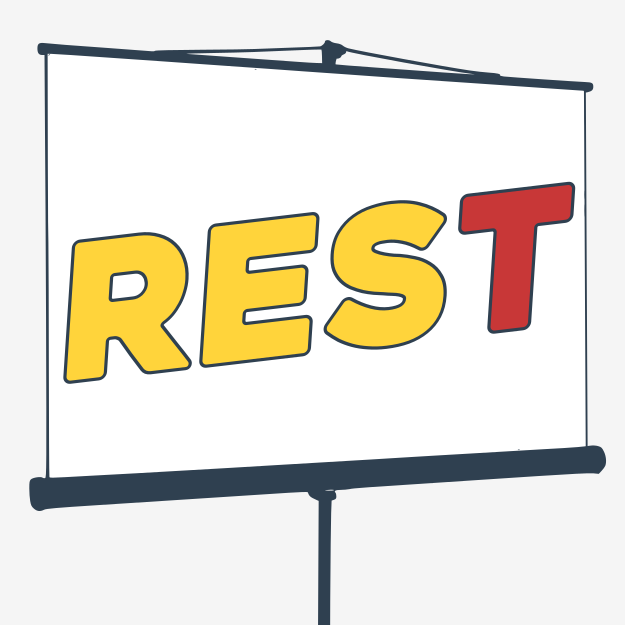

**T** stands for *Transfer*. The network (not only the Internet) is able to act as a **carrier allowing you to transmit states' representations to and from the server**.

Note: not the object, but its states, or actions able to change the states, are subject to the transfer. We can say (it's a very poor analogy, but it will work here) that transferring the states enables you to achieve results similar to those caused by method invocations.


**Representational State Transfer** - We hope the term is less mysterious now. Don't be afraid - we won't leave you alone with your doubts. There is a long road ahead of us.

Let's start our journey from the very first step - from a story about how the network works and how it is possible to send and receive something through it. Not only states - literally anything. This is why we want to tell you about **sockets**. It's a very good place to hit the road.

##BSD sockets
The sockets we want to tell you about have nothing to do with electricity - we're not going to plug anything into them and we won't draw energy from them.

A socket (in the sense that interests us now) is a kind of **end-point**. An end-point is **a point where the data is available to get it from and where the data may be sent to**. Your Python program can connect to the end-point and use it to interchange messages between itself and another program working somewhere far away on the Internet.

The history of sockets started in 1983 at the University of California in Berkeley, where the concept was formulated and where the first successful implementation was carried out.

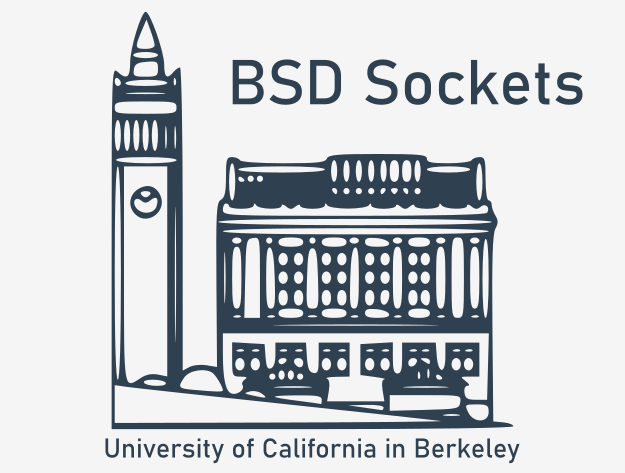

The resulting solution was a universal set of functions suitable for implementation in nearly all operating systems and available in all modern programming languages. It was named BSD sockets - the name was borrowed from Berkeley Software Distribution, the name of a Unix-class operating system, where the sockets were deployed for the very first time.

After some amendments, the standard was adopted by POSIX (a standard of contemporary Unix-class operating systems) as **POSIX sockets**.

We can say that all modern OSs implement BSD sockets in a more or less accurate way. Despite their differences, the general idea remains the same and this is what we are going to tell you about.

We don't want our course to be a schooling on network programming, so be aware that we'll present to you only the absolutely essential information on how network traffic is managed. We focus - as always - on programming in Python. By the way: BSD sockets were originally implemented in the "C" programming language, which is a good reason to start our "C" course.

The main idea behind BSD sockets is closely connected to Unix philosophy contained in the words everything is a file. A socket may be often treated as very specific kind of file. Writing to a socket results in sending the data through a network. Reading from a socket enables you to receive the data coming from the network.

By the way, **MS Windows reimplements BSD sockets in the form of the WinSock**. Fortunately, you're not able to feel the difference when programming in Python. Python hides them very thoroughly. We like Python for this (and not only for this).

Be prepared to assimilate many new terms and notions. Are you ready?

##Socket domains
Initially, BSD sockets were designed to organize communication in two different domains (not to be confused with internet domains like `pythoninstitute.org` - these terms have nothing in common). The two domains were:

* **Unix domain** (*Unix* for short) - a part of BSD sockets used to communicate programs working within one operating system (i.e., simultaneously present in the same computer system)
* **Internet domain** (*INET* in short) - a part of BSD socket API used to communicate programs working within different computer systems, connected together using a TCP/IP network (note: this doesn't preclude the use of INET sockets to communicate processes working in the same system)
In the next part, we'll deal with sockets working in the INET domain.


##Socket address
The two programs wanting to exchange their data must be able to identify each other - to be precise, they must have the ability to clearly indicate the socket they want to connect through.

INET domain sockets are identified (addressed) by pairs of values:

* the **IP address** of the computer system inside which the socked is located;
* the **port number** (more often referred to as service number)

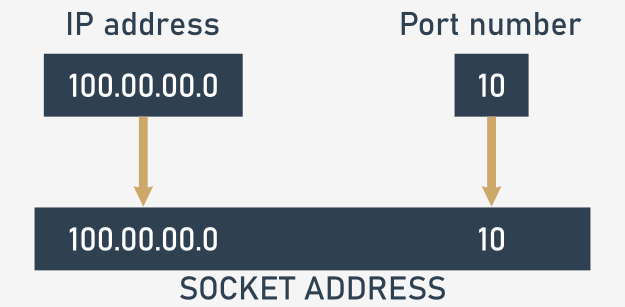

##IP address
An IP address (more precisely: **IP4** address) is **a 32-bit long value used to identify computers connected to any TCP/IP network**. The value is usually presented as four numbers from the range 0..255 (i.e., eight bits long) coupled together with dots (e.g., 87.98.239.87).

There is also a newer IP standard, named **IP6**, using 128 bits for the same purpose. Due to its slight prevalence (according to data published in August 2016, less than 20% of computers in the world are reachable by IP6 addressing) we will limit our considerations to IP4.

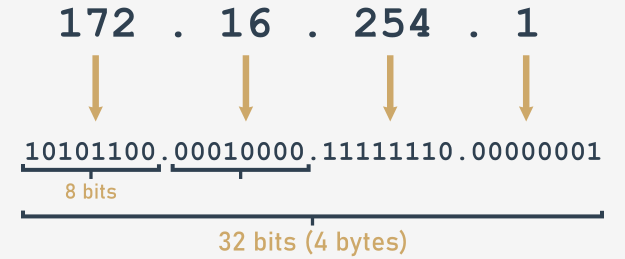

##Socket/service number
The socket/service number is a **16-bit long integer number identifying a socket within a particular system**. As you may have guessed already, there are 65,536 (2 ** 16) possible socket/service numbers.

The term service number came from the fact that many standard network services usually use the same, constant socket numbers e.g., **the HTTP protocol, a carrier of data used by REST, usually uses port 80**.


##Protocol
A protocol is **a standardized set of rules allowing processes to communicate with each other**. We may say that a protocol is a kind of network savoir-vivre specifying the rules of behaviour for all participants.

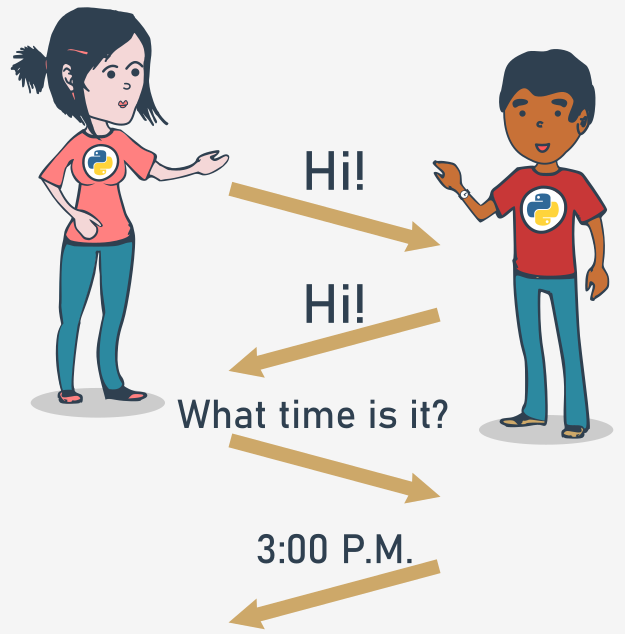

##Protocol stack
A protocol stack is a **multilayer** (hence the name) **set of cooperating protocols providing a unified repertoire of services**. The TCP/IP protocol stack is designed to cooperate with networks based on the IP protocol (the IP networks).


Protocol stack

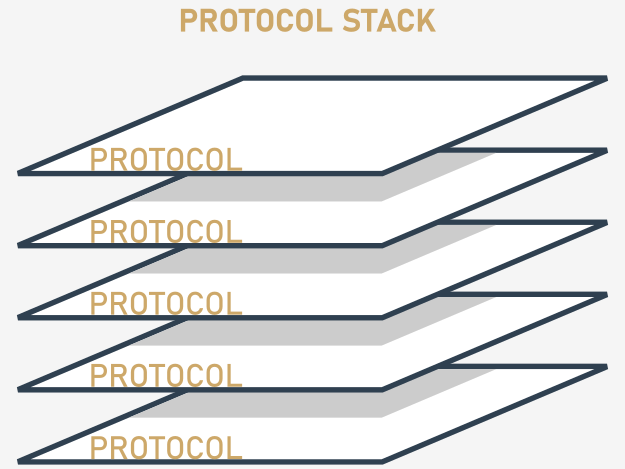

The conceptual model of network services describes the protocol stack in a way where the most basic, **elementary services are located at the bottom of the stack**, while the most advanced and abstractive lie on the top.

It is assumed that any higher layer implements its functionalities using services provided by the adjoining lower layer (note: it is the same as in the other parts of the operating system, e.g., you program implements its functionality using OS services and OS services implement their functionalities using hardware facilities).


##IP
The IP (*Internetwork Protocol*) is one of the lowest parts of TCP/IP protocol stack. Its functionality is very simple - it is able to **send a packet of data (a datagram) between two network nodes**.


Datagrams

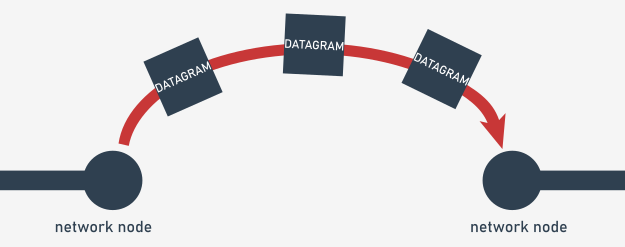

IP is a very unreliable protocol. It doesn't guarantee that:

* any of the sent datagrams will reach the target (moreover, if any of the datagrams is lost, it may remain undetected)
* the datagram will reach the target intact;
* a pair of sent datagrams will reach the target in the same order as they were sent.
The upper layers are able to compensate all these IP's infirmities.

##TCP
The TCP (*Transmission Control Protocol*) is the highest part of the TCP/IP protocol stack. It **uses datagrams** (provided by the lower layers) and **handshakes** (an automated process of synchronizing the flow of data) **to construct a reliable communication channel able to transmit and receive single characters**.

Its functionality is very complex, as it guarantees that:

* a stream of data reaches the target, or the sender is informed that communication has failed;
* data reaches the target intact.

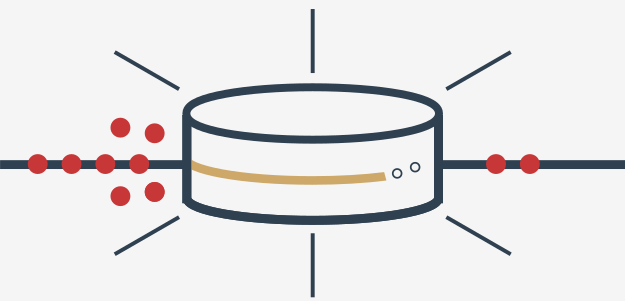

##UDP
The UDP (*User Datagram Protocol*) lies at the higher part of TCP/IP protocol stack, but lower than the TCP. It doesn't use handshakes, which has two serious consequences:

* it is faster than TCP (due to fewer overheads)
* it is less reliable than TCP.

UDP

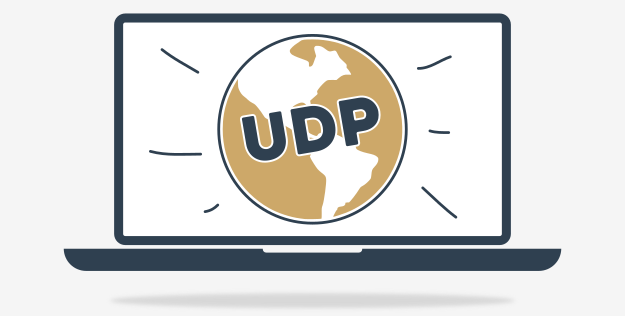

This means that:

* TCP is a first-choice protocol for applications where data safety is more important that efficiency (e.g., WWW, REST, mail transfer, etc.)
* UDP is more adequate **for applications where response time is crucial** (DNS, DHCP, etc.)

##Connection-oriented vs. connectionless communication
A form of communication which **demands some preliminary steps to establish the connection and other steps to finish it** is connection-oriented communication.

Usually, both parties involved in the process aren't symmetrical i.e., their roles and routines are different. Both sides of the communication are aware that the other party is connected.

A phone call is a perfect example of connection-oriented communication.

Look:

* the roles are strictly defined: there is a caller and there is a callee;
* the caller must dial the callee's number and wait till the network routes the connection;
* the caller must wait for the callee to answer the call (the callee may reject the connection, or just not answer the call)
* the actual communication won't start until all the previous steps are completed successfully;
* the communication ends when either of the parties hangs-up.

TCP/IP networks use the following names for both sides of the communication:

* the side that initiates the connection (caller) is named **client**;
* the side that answers the client (callee) is named **server**.
Connection-oriented communications are usually built on top of TCP.

A communication which **can be established ad-hoc** (snap - just like that) is *connectionless communication*. Both parties usually have equal rights, but neither of the parties is aware of the other side's state.

Using walkie-talkies is a very good analogy for connectionless communication, because:

* either of the parties of communication may initiate the communication at any time; it only requires pushing the talk button;
* talking to the mic doesn't guarantee that anybody will hear (it’s necessary to wait for an incoming answer to be sure)

Connectionless communications are usually built on top of UDP.

Okay. Taking such a dose of theory requires some practice as soon as possible. Let's do it.



#1.2 How to use sockets in Python

##How to fetch a document from a server using Python

We are going to write our first program making use of network sockets. Of course, we'll harness Python for this purpose.

Here are our goals:

* we want to write **a program which reads the address of a WWW site** (e.g., pythoninstitute.org) using the standard `input()` function and **fetches the root document** (the main HTML document of the WWW site) of the specified site;
* the program **outputs the document** to the screen;
* the program **uses TCP to connect to the HTTP server**.
Our program has to perform the following steps:

1. **create a new socket** able to handle connection-oriented transmissions based on TCP;
2. **connect the socket to the HTTP server** of a given address;
3. **send a request to the server** (the server wants to know what we want from it)
4. **receive the server's response** (it will contain the requested root document of the site)
5. **close the socket** (end the connection)
This is our road map. Let's follow the route.

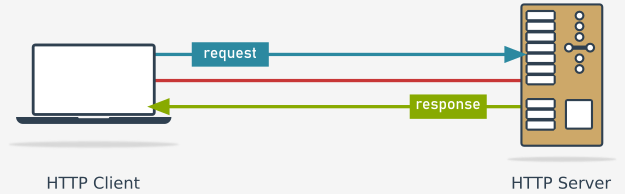

##Importing a socket
We are in need - we need a socket. How do we obtain a socket? Can we order it from an Internet store? Is it free?

Yes, it's free. As you probably suspect, we need a specialized module. Python offers just such a module. You won't be surprised if we tell you that the module is named `socket`, will you?

This is what we'll put at the top of our code:



In [ ]:
import socket

##Obtaining user input
We also need **the name of the HTTP server** we're going to connect to. In fact, it's not our problem. The user knows it better. Let's ask him or her:

In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")

The user input may can take two different forms:

* it can be **the domain name of the server** (like www.pythoninstitute.org, but without the leading http://)
* it can be **the IP address of the server** (like 87.98.235.184), but it must be said firmly that this variant is potentially ambiguous. Why? Because **there can be more than one HTTP server located at the same IP address** - the server you will reach may be not the server you intended to connect to.

It may sound cynical - it's not our problem which of these two ways our users choose. They know better. The customer is always right.

##The socket module: creating a socket
The `socket` module contains all the tools we need to deal with sockets. We aren't going to present all its capabilities - as we mentioned before, we aren't and won't be focusing on network programming. We want to show you how the TCP/IP works and how it is able to act as a **carrier for REST**.

We can say that TCP/IP is interesting for us only to the extent that it is able to transport HTTP traffic, and HTTP is interesting for us only to the extent that it is able to act as a relay for REST. If you want to get fully accustomed with networks, you may need to continue your reading using another of our courses.

The socket module provides a class named `socket` (what a coincidence!) which encapsulates a bundle of properties and activities related to the actual sockets' behaviour. This means that the first step is to **create an object of the class** - this is how we carry out the creation:



In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)


As you can see, the constructor takes two arguments, both declared within the module. Let us tell you about them:

* the former argument is a domain code (we may use the `AF_INET` symbol here to **specify the Internet socket domain** - do you remember?

>We told you about Unix and INET domains in the previous section); as different domains require completely different socket countenance, the target domain has to be known at the moment;

* the latter argument is a socket type code (we may use the `SOCK_STREAM` symbol here to **specify a high-level socket able to act as a character device** - a device that can handle single characters, as we are interested in transferring data byte by byte, not as fixed sized blocks (e.g., a terminal is a character device, while a disk isn't)
Such a socket is prepared to work on top of TCP protocol - it's the default socket configuration.

If you want to create a socket to cooperate with another protocol, like UDP, you will need to use a different constructor syntax.

As you can see, the newly created socket object will be referenced by a variable named `sock`. No, it's not about the clothes. Really.

##Connecting to a server
If we use a socket on the client's side, we are ready to make use of it. The server, however, has a few more steps to take. In general, servers are usually more complex than clients (as one server serves many clients simultaneously) - this is the moment where our telephone analogies stop working.

The configured socket (just like ours) is able to be connected to its counterpart on the server's side. Look at the code in the editor - this is how we perform the connection.

The `connect()` method does what it promises - it tries to connect your socket to the service of the specified address and port (service) number.

Note: we make use of the variant where the two values are passed to the method as elements of a tuple. This is why you see two pairs of parentheses there. Omitting one of them will obviously cause an error.

Note: the form of the target service address (a pair consisting of the actual address and port number) is **specific for the INET domain**. Don't expect it to look the same in other domains.

You may ask - why 80? Can I put something else instead of this? No, you can’t. 80 is a well-known service number for HTTP. Any Internet browser will try to connect to port number 80 by default, so we do it, too.

Is it possible that the connection attempt will fail? Of course it is. There are lots of possible reasons: a malformed address of the service, a non-existent server, a connection error, and more. How we can discover such unpleasant events?

If something goes wrong, the `connect()` method (and any other method whose results may be unsuccessful) **raises an exception**. Let us postpone the issue for a moment. For the moment we can assume then everything goes smoothly.

Yes, we know. The awakening from this dream can be painful.

The connection is ready. The server has accepted our connection and is very curious about what it will hear from us. Don't let it wait too long.

But... what do we really want to tell the server anyway? How do we talk to the HTTP server to be sure that it understands us? We have to speak in HTTP, of course.

In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((server_addr, 80))

##The `GET` method
The HTTP protocol is one of the simplest Internet protocols, but it is still too complex to discuss fully here. For now, we'll tell you how to get a root document from the WWW site. Of course, we'll tell you more about it later.

A conversation with the HTTP server consists of **requests (sent by the client) and responses (sent by the server)**.

HTTP defines a set of acceptable requests - these are the request methods or HTTP words. The method asking the server to send a particular document of a given name is called `GET` (it's rather self-explanatory, isn't it?).

To get a root document from a site named *www.site.com* the client should send the request containing a correctly formed `GET` method description:

```
GET / HTTP/1.1\r\n
Host: www.site.com\r\n
Connection: close\r\n
\r\n
```

The `GET` method requires:

* a line containing the method name (i.e., `GET`) followed by the name of the resource the client wants to receive; the root document is specified as a single slash (i.e., `/`); the line must also include the HTTP protocol version (i.e., `HTTP/1.1`) and must end with the characters `\r\n`; note: all lines must end the same way;
* a line containing the name of the site (e.g., www.site.com) preceded by the parameter name (i.e., `Host:`)
* a line containing a parameter named `Connection:` along with its value `close`, which forces the server to close the connection after the first request is served; it will simplify our client's code;
* an empty line is a **request terminator**.
It doesn’t look very clear, but it doesn't exceed our capabilities, does it?

Okay, we know now that HTTP won't be our favourite language, but how we can send such a request to the server? It's simple. We have to invoke a method from within the socket object.

Its name is... can you guess?

##Requesting a document from a server
Yes, it's `send` - look at how we combine it with our code from the previous lesson:

In [ ]:
sock.send(b"GET / HTTP/1.1\r\nHost: " +
          bytes(server_addr, "utf8") +
          b"\r\nConnection: close\r\n\r\n")

The `send()` method doesn't natively accept strings - this is why we have to use the `b` prefix before the literal parts of the request string (it silently translates the string into bytes - an immutable vector consisting of values from the range 0..255, which `send()` likes most) and this is also why we should invoke `bytes()` to translate the string variable in the same manner.

Note: the bytes' second argument specifies the encoding used to store the server's name. UTF8 seems to be the best choice for most modern OSs.

The action performed by the `send()` method is extremely complicated - it engages not only many layers of the OS, but also lots of network equipment deployed on the route between the client and server, and obviously the server itself.

Fortunately, we don't need to worry about it.

Of course, if anything inside this complex mechanism fails, `send` will fail, too. As you may expect, **an exception is raised** then.

Anyway, the die is cast. The request has been sent. What can we expect from the server?

If the server is functional and there is a root document ready to send to us, we are allowed to receive it. We'll do it now without hesitation.

Look at the final version of our code. We've provided it in the editor.

In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((server_addr, 80))
sock.send(b"GET / HTTP/1.1\r\nHost: " +
          bytes(server_addr, "utf8") +
          b"\r\nConnection: close\r\n\r\n")

##Requesting a document from a server: continued
The `recv()` method (in our humble opinion, not a very fortunate abbreviation of receive) waits for the server's response, gets it, and puts it inside a newly created object of type bytes. Look at the code we've provided in the editor.

The argument specifies the maximal acceptable length of the data to be received. If the server's response is longer than this limit, it will remain unreceived.

You will need to invoke `recv()` again (maybe more than once) to get the remaining part of the data. It's a general practice to invoke `recv()` as long as it returns some data.

There are lots of bad things which can spoil our game. For example, the server may not want to talk with us.

The transmission may cause some errors, too. All these fatalities will raise exceptions.

What next?

In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((server_addr, 80))
sock.send(b"GET / HTTP/1.1\r\nHost: " +
          bytes(server_addr, "utf8") +
          b"\r\nConnection: close\r\n\r\n")
reply = sock.recv(10000)

What server do you want to connect to? Efefef


gaierror: [Errno -2] Name or service not known

##Closing the connection
As we want to neither send nor receive anything more, we ought to announce it to the server. We will do it in a very simple form, just like here:

In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((server_addr, 80))
sock.send(b"GET / HTTP/1.1\r\nHost: " +
          bytes(server_addr, "utf8") +
          b"\r\nConnection: close\r\n\r\n")
reply = sock.recv(10000)
sock.shutdown(socket.SHUT_RDWR)


Invoking `shutdown()` is like a message whispered directly into the server's ear: "We have no more to say to you. We don't want to hear from you, either. The rest is silence."

Thanks to that, the server is aware of our intentions.

The following function arguments say more about our views for the future:

* `socket.SHUT_RD` - we aren't going to read the server's messages anymore (we declare ourselves deaf)
* `socket.SHUT_WR` - we won't say a word (actually, we'll be dumb)
* `socket.SHUT_RDWR` - specifies the conjunction of the two previous options.
Is there anything more we should do now?

As our `GET` request demanded that the server close the connection as soon the response is sent and the server has been advised of our next steps (or rather of the fact that we've already done what we wanted to), we can assume that the **connection is fully terminated at this moment**.

Some would say that closing it explicitly is an exaggerated diligence. We don't share this view and prefer to close the connection by expressing it literally.

The parameterless `close()` method will do it for us - see our code in the editor.

Okay. We've received something. Is it worth seeing with our own eyes? We won't see until we see.

In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((server_addr, 80))
sock.send(b"GET / HTTP/1.1\r\nHost: " +
          bytes(server_addr, "utf8") +
          b"\r\nConnection: close\r\n\r\n")
reply = sock.recv(10000)
sock.shutdown(socket.SHUT_RDWR)
sock.close()

##What did we get?
Don't expect our code to be able to display the received document in the same way as the Internet browser shows it to you. A code able to do anything like this won't fit on your screen.

Moreover, we don't want to write a new browser. We just want to check whether the data we received looks reasonable.

We'll do it in the simplest (but a very elegant) way - we'll just print it out using the built-in `repr()` function, which takes care of the clear (almost) **textual presentation of any object**. We don't need anything more.

This is why the last line of our code look as follows: `print(repr(answ))`.

Our code is complete - let's see it in all its glory in the editor window.

In [ ]:
import socket

server_addr = input("What server do you want to connect to? ")
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((server_addr, 80))
sock.send(b"GET / HTTP/1.1\r\nHost: " +
          bytes(server_addr, "utf8") +
          b"\r\nConnection: close\r\n\r\n")
reply = sock.recv(10000)
sock.shutdown(socket.SHUT_RDWR)
sock.close()
print(repr(reply))

##What can we expect from the server's response?
If everything went successfully (the user entered a valid address, the Internet worked as expected, the server was willing to cooperate, etc.) you may see something like this on your screen:

```
What server do you want to connect to?  www.site.com
b'HTTP/1.1 200 OK\r\nDate: Fri, 08 Mar 2019 08:24:41 GMT\r\nServer: UltraDNS Client Redirection Server\r\nLast-Modified: Fri, 08 Mar 2019 08:24:41 GMT\r\nAccept-Ranges: none\r\nConnection: close\r\nContent-Type: text/html\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n'
```

Does it look friendly? Of course not. So... what do we see here actually?



In fact, we see two separate parts:

* the first is the response header. We'll tell you a little secret - the topmost line is the most important, as is says whether the server sent back the requested document or not. Look, there is a very significant three-digit number: `200`.

>It's your lucky number, as it's the status code. The number `200` is your best friend, as it announces that the mission was fully successful and you've got your document. The next few lines describe many important details, but we don't need them now. Skip your focus to the first empty line. It's very momentous as it separates the header from...

* the document. Yes, this is the place where it starts. It may very bloated (it usually is) and we don't want to present it in full.

It's not important now. We're not going to study HTML. Not here, anyhow.

We'll to dive into something else - what happens if something goes wrong. The Internet is an unfriendly space - many things may fail. For example...

##Entering a non-existing/malformed address
The user has entered a non-existent or malformed address (no matter whether it’s expressed as a domain name or IP address). What will happen then? You can see such accidents here:
```
What server do you want to connect to? a.non.existent.name
Traceback (most recent call last):
  File "cli.py", line 5, in <module>
    sock.connect((srvaddr, 80))
socket.gaierror: [Errno -2] Name or service not known

What server do you want to connect to? anonexistentname
Traceback (most recent call last):
  File "cli.py", line 5, in <module>
    sock.connect((srvaddr, 80))
socket.gaierror: [Errno -2] Name or service not known
```

The connect function throws an exception named `socket.gaierror` and its name comes from the name of a low-level function (usually provided not by Python but by the OS kernel) named `getaddrinfo()`. The function tries - among others - to find the full address information regarding the received argument.

As you probably guess, `connect()` uses `getaddrinfo()` to marshal a new connection with the server. If `getaddreinfo()` fails, an exception is thrown and the journey ends before it begins. Sad but true.

Note: `socket.gaierror` covers more than one possible reason for the failure. Our example shows two of them - the former when the address is syntactically correct but doesn't correspond to any existing server, and the latter when the address is obviously malformed.

As you can see, the exception is the same, but it carries different accompanied information about the reasons.

It is also possible that a server of a specified address exists and it is working but doesn't provide the desired service. For example, a dedicated mail server may not respond to the connections addressed to port number 80.

If you want to provoke such an event, replace 80 in the `connect()` invocation with any five-digit number not exceeding `65535` (`11111` seems to be a good idea) and run the code.

We bet you'll see something like this:
```
What server do you want to connect to? dedicated.server
Traceback (most recent call last):
  File "cli2.py", line 6, in <module>
    sock.connect((srvaddr, 11111))
ConnectionRefusedError: [Errno 111] Connection refused
```


As you can see, the exception is different than before - its name announces that the server has refused our connection. In other words, the server isn't intended to provide the services we want to utilize.


##The socket.timeout exception
The last exception we want to tell you about is `socket.timeout`. This exception is raised when the server's reaction doesn't occur in a reasonable time - the length of our patience can be set using a method named `settimeout()`, but we don't want to go into details. We hope you'll forgive us.

If you really want to induce such an exception, you'll have to do something naughty like break the network connection in the middle of a transfer, or shut down the server at a precisely chosen moment. We don't want you to do this. We want you to remember that such a situation may occur. Be prepared. Rust never sleeps.

Armed with a basic knowledge about TCP/IP, we are ready to continue our trip. See you at the next stop.


#1.3 Our new friend JSON
##Hi, I'm JSON
Do you sometimes feel that coping with IT issues is a continuous struggle with acronyms? Well, you’re not alone. We share this opinion. An old anecdote says that computer technology development is in fact based on TLA. What is TLA? It's simple – it's a Three-Letter Acronym. Close your eyes, strain your mind and try to recall five acronyms commonly used in the IT world.

We bet four of them will be TLA.

And – look! – TLA is a TLA too. What a coincidence!

Now it’s time to break this pattern. The acronym we'll present to you now is four letters long. What a nice change!


The JSON acronym

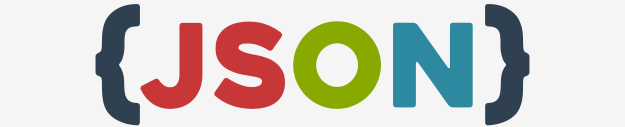

Let us explain its meaning:

* Java...
* ...Script
* Object
* Notation
As you can see, there’s a little riddle inside the name. It may be a bit disturbing, too, and some sudden questions may have appeared in your mind just now, e.g., “Java? Do you want me to learn Java? Or even JavaScript?”

No, we don't. Fortunately, the notation we want to tell you about, although created with JavaScript environments in mind, works perfectly without JavaScript. In fact, it can be used by virtually all modern programming environments thanks to the standardized libraries of functions and unified services. It doesn't matter what programming language has been used to implement a certain solution – JSON is a kind of universal bridge able to move data between seemingly incompatible parties.

JSON is the answer to quite a basic need – the need to transfer data that is the content of an object or set of objects. The mechanism which solves it should be portable and platform independent.

How can we meet such a requirement?

The problem we need to struggle with is **how to represent an object** (understood as a set of data of different types, including other objects) or even a single value in a way that can survive network transfers and inter-platform conversions.

JSON solves the problem using two simple tricks:

* it uses **UTF-8 coded text** – this means that no machine/platform-dependent formats are used; it also means that the data JSON carries is readable (poorly, but always readable) and comprehensible by humans;
* it uses a simple and not very expanded **format** (we can call it syntax, or even grammar) to represent mutual dependencies and relations between different parts of objects, and is able to transfer not only the values of objects’ properties, but also their names.
In JSON, it can be an unnamed value like a number, a string, a Boolean or… nothing , although this is not what we like most about JSON. JSON is able to carry far more complex data, collected and aggregated in larger compounds.

If you want to transfer not only raw data but also all the names bound to it (like the way in which objects hold their properties), JSON offers a syntax which looks like a close relative of Python's dictionary, which is, in fact, a set of `key:value` pairs. Making such an assumption leads us to the following question – can we use Python's syntax to code and decode network messages in `REST`?

Yes, we can, but it won't be JSON. If you want your data to be widely understood (not only by Python counterparts), you should use JSON.

Let’s start with a very simple example. We want to build a message encapsulating an object containing just one property named prop along with its real (floating-point) value of `2.78`.

This is how JSON comes to this:

`{ "prop": 2.78 }`

Simple? Absolutely!

Now we’re ready to go deeper. Let us show you how JSON represents values of common types.

Note: our presentation is rather comprehensive. If you need more details, refer to the original JSON documentation available here: http://www.ecma-international.org/publications/files/ECMA-ST/ECMA-404.pdf.

If you want to encode an integer value (e.g., 123) you will specify this in the following way:

`123`

Looks familiar, doesn't it? Don’t get carried away just yet. JSON's integer literals use **some different tricks** to those of Python. In general, you may expect no surprises when you use regular decimal integers, but keep in mind that **JSON knows nothing about numbers written using radices different to 10**, so literals like these:

* `0x10`
* `0o10`
* `0b10`

won't be recognized in the JSON environment. Feel free to use a minus sign to put negative numbers inside the JSON text. **Don't use a plus sign** to show that a number is positive. Moreover, **don't use leading zeros**. That's an order.


**Real numbers** in JSON are the same as in Python, including utilization of scientific notation.

Here’s an example:

```
3.141592653589
3.0857E16
−1.6021766208E−19
```

JSON **strings** may look familiar, but there is one important difference – **you must not use apostrophes** to delimit the text. The only delimiter allowed is a quote, like here:

`"Python"`

This means that you can’t just insert a quote inside the string – you have to use our old friend backslash (\) followed by a quote instead.

Nothing exciting – but we’re used to that:

`"\"Monty Python's\""`


Just like in Python, there are some more digraphs and moregraphs (we’re joking, don’t let us confuse you) starting with \ in JSON. We’ve collected all of them here:


Table with digraphs

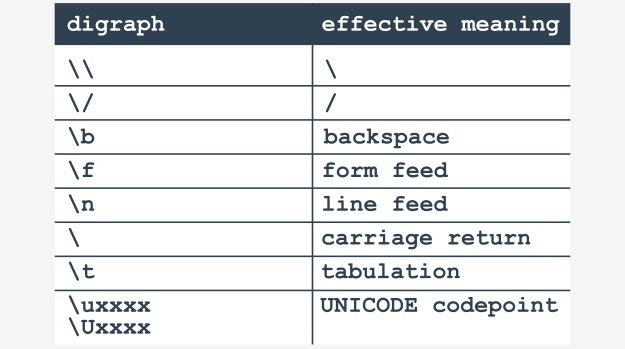

Note that in Python you don’t have to precede / with \.

The `\u` (or `\U`) digraph starts a hexadecimal UNICODE code point and must contain exactly **four hexadecimal digits** (it doesn't matter if the letters are upper- or lower-case).

Don't forget that JSON strings **cannot be split over multiple lines** – each string must fit entirely on one line (of course, there may be more than one string on the same line).

**Boolean values** are represented (like in Python) by two specific identifiers (the literal name tokens): **true** and **false**:

```
true
false
```

Note: you have to **preserve the case of the literals**, as this is the only acceptable form.


There is one more literal name token in JSON, whose meaning is similar to the one known in Python as `None` – it may be used to represent no value, or a value without any meaning.

It is called `null` in JSON:

```
null
```

In JSON, all the above values may be combined (or packed) in two ways:

* inside **arrays** (which are a very close relative to Python lists);
* inside **objects** (which resemble Python dictionaries more than objects)
It should be noted that both ways can recursively incorporate any of the two, e.g., a list may contain an object which contains an object which contains a list and so on.

Any JSON object property may contain (or carry) an array. The syntax JSON uses to encode arrays is very similar to the one used by Python to describe lists. For example, it uses square brackets (or just brackets) to delimit array content and uses commas to separate an array's elements – just like here:

`[1, 2, 3]`


An **empty array** is denoted simply as a pair of brackets – just like in Python:

`[ ]`


Contrary to an array, a JSON object is a set of property specifications surrounded by a pair of braces (curly brackets) – just like here – we’ve marked them in red:

`{ "prop": 2.78 }`

The property specification is a `name:value` pair with a colon as a separator where the name must be **enclosed in quotes**.

It's worth mentioning that braces are commonly used in all C-derived programming languages and play a role similar to the one known from Python nesting – they mark the boundaries of data definitions or blocks of code. No wonder, then, that they appear in JSON, as JavaScript derives from the C-language too. The similarity to Python dictionary syntax is unintentional.

In this approach, a JSON object is a **set of property specifications separated by commas**.

One important (and very surprising) thing should be stated here. There are **no restrictions on property names**. No, not at all. These names don't identify variables, so they don’t have to be unique. They don't have to start with a letter. They can even contain a colon, which may seem a little weird at first glance.

This doesn't mean that you have to use weird property names. We suggest you don’t do that at all. It only means that the property name's semantic isn't a part of the JSON standard. In other words, JSON is semantically blind when it comes to property names. It's none of its business how you name your properties.


If you want to express the fact that a particular **object is empty**, you need to leave the braces and ensure that there is no content between them – just like here:

`{ }`



When there is more than one property in an object, you can specify all of them in **any order** using commas to separate the items from each other. As JSON ignores white spaces (including tabs) which aren't a part of strings, you can format (or unformat) the text in any way.

For example, both these JSON objects are the same:
```
{
x: 123,
y: -1
}
```

```
{x:123, y:-1}
```
The first is easier to read (for humans), while the second is cheaper to transmit (it occupies fewer bytes).

Of course, you may incorporate **different types** of data inside one object:

```
	{ me: "Python",
	pi: 3.141592653589,
	parsec: 3.0857E16,
	electron: −1.6021766208E−19
	friend: "JSON",
	off: true,
	on: false,
	set: null }
```

Any of the previously described elements can be put **inside an array**, and this rule may be applied recursively, which means that an array can contain another array which may contain another complete object, and so on.

The example shows a very specific and not very practical, but completely correct, compound:

`{ob:{ar:["a", 1, 3.14, false]}}`

The JSON object contains another object named `ob`, which consists of one property, which is an array.

Okay. We met a new friend which came to us from a distant country. How do we speak to him (*) in Python in order to be understood? Is it even possible?



(*) yes! him because it's a SON!

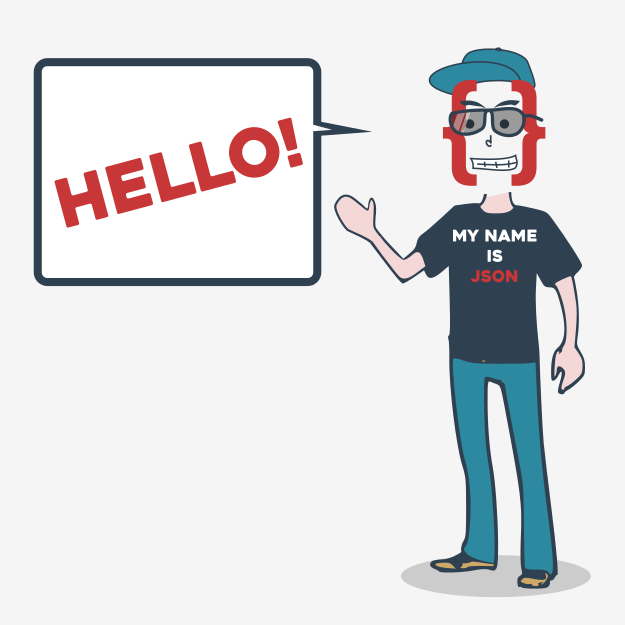

#1.4 Talking to JSON in Python


##Working with the JSON module in Python
Now that we're familiar with JSON essentials, it's time to learn how to use it with Python. We're a little worried you may think that we want you to laboriously build JSON messages, fretting over all these brackets, parentheses and colons, and to break down complex JSON lines into prime factors. Nothing could be further from the truth! We’re not in the habit of coming up with such crazy ideas, although, to be honest, it's not as complex as it may seem and we're convinced that you’d be able to cope with such a challenge. Fortunately, you don't need to.

Why?

Because there’s a Python module – named **JSON** – which is able to perform all those drudgeries for you.

How do we start a new adventure? It's obvious, and we're sure that you knew it before we asked:

In [ ]:
import json

The first JSON module's power is the ability to automatically **convert Python data** (not all of it and not always) into a JSON string. If you want to carry out such an operation, you may use a function named `dumps()`.

Note: the `’s` at the end of the function's name means string. There is a very similar function with the name deprived of this suffix which **writes the JSON string to the file** for file-like streams.

The function does what it promises – it takes data (even somewhat complicated data) and produces a string filled with a JSON message. Of course, `dumps()` isn't a prophet and it's not able to read your mind, so don't expect miracles.


Let’s start with some simple snippets.

The first of our samples takes a number and outputs a number – we don't expect anything more:



In [ ]:
import json

electron = 1.602176620898E10 - 19
print(json.dumps(electron))

16021766189.98


The code outputs:

`16021766189.98`

Note: the notation is different but the value remains the same. Check it yourself.

Let's do the same but with a **string**, like this:

In [ ]:
import json

comics = '"The Meaning of Life" by Monty Python\'s Flying Circus'
print(json.dumps(comics))

The code outputs:

`"\"The Meaning of Life\" by Monty Python's Flying Circus"`

As you can see, all JSON requirements have been met.


Now’s a good moment to introduce a **list**. What do you think about this example?

In [ ]:
import json

my_list = [1, 2.34, True, "False", None, ['a', 0]]
print(json.dumps(my_list))

As you can see, there are actually two lists. Is that a problem? Not at all!

The code prints:

`[1, 2.34, True, "False", null, ["a", 0]]`

We want to ask you a question here – what will happen if we use a tuple instead of a list? The answer is predictable – nothing. As JSON cannot distinguish between lists and tuples, both of these are converted into JSON arrays.


Let’s check a **dictionary**. Here’s a simple test:

In [ ]:
import json

my_dict = {'me': "Python", 'pi': 3.141592653589, 'data': (1, 2, 4, 8), 'set': None}
print(json.dumps(my_dict))

{"me": "Python", "pi": 3.141592653589, "data": [1, 2, 4, 8], "set": null}


And this is the output of the code:

`{"me": "Python", "pi": 3.141592653589, "data": [1, 2, 4, 8], "friend": "JSON", "set": null}`

Now we’re ready to draw some conclusions.

As you can see, Python uses a small set of simple rules to build JSON messages from its native data. Here it is:


Table of JSON elements

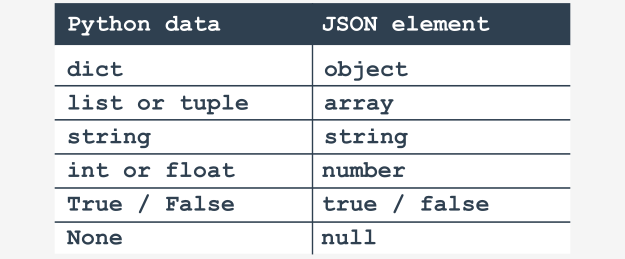

It looks simple and consistent. So where’s the trap?


The trap is here:


In [ ]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


some_man = Who('John Doe', 42)
print(json.dumps(some_man))

TypeError: Object of type Who is not JSON serializable

The output you'll see is extremely disappointing:

`TypeError: Object of type 'Class' is not JSON serializable`

Yes, that's the clue. You cannot just dump the content of an object, even an object as simple as this one.

Of course, if you don't need anything more than a set of object properties and their values, you can perform a (somewhat dirty) trick and dump not the object itself, but its `__dict__` property content. It will work, but we expect more.

What should we do?

There are at least two options we can make use of. The first of them is based on the fact that we can **substitute** the function `dumps()` uses to obtain a textual representation of its argument. There are two steps to take:

* **write your own function** knowing how to handle your objects;
* **make `dumps()` aware of** it by setting the keyword argument named default;
Now look at the code in the editor window. The example shows a simple implementation of the idea.

The code prints:

`{"name": "John Doe", "age": 42}`


Note: we decided to use the dictionary as a target for the JSON message. Thanks to that we’ll save the property names along with their values. It’ll make JSON easier to read and more understandable for humans.

Note: raising a `TypeError` exception is obligatory – this is the only way to inform `dumps()` that your function isn't able to convert objects other than those derived from the class `Who`.

Note: the process in which an object (stored internally by Python) is **converted into textual or any other portable aspect** is often called **serialization**. Similarly, the reverse action (from portable into internal) is called **deserialization**.

As you can see, we’ve converted (serialize) our object into a dictionary – `dumps()` will turn it into a JSON object.

In [ ]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


def encode_who(w):
    if isinstance(w, Who):
        return w.__dict__
    else:
        raise TypeError(w.__class__.__name__ + ' is not JSON serializable')


some_man = Who('John Doe', 42)
print(json.dumps(some_man, default=encode_who))


The second approach is based on the fact that the serialization is actually done by the method named `default()`, which is a part of the `json.JSONEncoder class`. It gives you the opportunity to overload the method defining a `JSONEncoder's` subclass and to pass it into `dumps()` using the keyword argument named `cls` – just like in the code we've provided in the editor.

As you can see, we are released from the obligation to raise any exceptions. Nice, isn't it?

The code produces the same output as the previous one:

`{"name": "John Doe", "age": 42}`


It seems that we know enough about how to travel from Python land to JSON world, but still know anything about how to return. Let's take care of it.


The function which is able to **get a JSON string and to turn it into Python data** is named `loads()` – it takes a string (hence the s at the end of its name) and tries to create a Python entity corresponding to the received data.

This is how it goes:



In [ ]:
import json

jstr = '16021766189.98'
electron = json.loads(jstr)
print(type(electron))
print(electron)


The code prints:

```
<class 'float'>
16021766189.98
```

The `loads()` function is able to cope with **strings**, too. Take a look at the snippet:

In [ ]:
import json

jstr = '"\\"The Meaning of Life\\" by Monty Python\'s Flying Circus"'
comics = json.loads(jstr)
print(type(comics))
print(comics)

Can you see the double backslashes inside the `jstr`? Are they really needed?

Yes, they are, as we have to deliver an exact JSON string into the `loads()`. This means that the backslash must precede all quotes existing within the string. Removing any of them will make the string invalid and `loads()` will not like it for sure.

The code outputs:

```
<class 'str'>
"The Meaning of Life" by Monty Python's Flying Circus
```

In [ ]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class MyEncoder(json.JSONEncoder):
    def default(self, w):
        if isinstance(w, Who):
            return w.__dict__
        else:
            return super().default(self, z)


some_man = Who('John Doe', 42)
print(json.dumps(some_man, cls=MyEncoder))


{"name": "John Doe", "age": 42}


And what about **lists**? Is `loads()` smart enough to interpret them correctly?

Yes, it is – take a look:

In [ ]:
import json

jstr = '[1, 2.34, true, "False", null, ["a", 0]]'
my_list = json.loads(jstr)
print(type(mylist))
print(mylist)

The code prints:

```
<class 'list'>
[1, 2.34, True, 'False', None, ['a', 0]]
```

We expect that the JSON **object** will be processed correctly.

Yes, it will:

In [ ]:
import json

json_str = '{"me":"Python","pi":3.141592653589, "data":[1,2,4,8],"friend":"JSON","set": null}'
my_dict = json.loads(json_str)
print(type(my_dict))
print(my_dict)


The code prints:

```
<class 'dict'>
{'me': 'Python', 'pi': 3.141592653589, 'data': [1, 2, 4, 8], 'friend': 'JSON', 'set': None}
```

Our tests show that the table we presented before works successfully in both directions. There’s only one specific difference: if a number encoded inside a JSON string **doesn't have any fraction **part, Python will create an **integer** number, or a **float number otherwise**.

But what about Python's objects – can we deserialize them in the same way as we performed the serialization?

As you probably expect, deserializing an object may require some additional steps. Yes, indeed. As `loads()` isn't able to guess what object (of which class) you actually need to deserialize, you have to provide this information.

Take a look at the snippet we've provided in the editor window.

As you can see, there’s a keyword argument name `object_hook`, which is used to point to the function responsible for creating a brand new object of a needed class and for filling it with actual data.

Note: the `decode_who()` function receives a Python entity, or more specifically – a **dictionary**. As `Who`'s constructor expects two ordinary values, a string and a number, not a dictionary, we have to use a little trick – we've employed the double `*` operator to turn the directory into a **list of keyword arguments** built out of the dictionary's `key:value` pairs. Of course, the keys in the dictionary must have the same names as the constructor's parameters.

Note: the function, specified by the `object_hook` will be invoked only when the JSON string describes a JSON object. Sorry, there are no exceptions to this rule.

In [ ]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


def encode_who(w):
    if isinstance(w, Who):
        return w.__dict__
    else:
        raise TypeError(w.__class__.__name__ + 'is not JSON serializable')


def decode_who(w):
    return Who(w['name'], w['age'])


old_man = Who("Jane Doe", 23)
json_str = json.dumps(old_man, default=encode_who)
new_man = json.loads(json_str, object_hook=decode_who)
print(type(new_man))
print(new_man.__dict__)


<class '__main__.Who'>
{'name': 'Jane Doe', 'age': 23}


As previously, a purer object approach is also possible, and is based on redefining the `JSONDecoder` class. Unfortunately, this variant is more complicated than its encoding counterpart.

We don't need to rewrite any method, but we do have to **redefine the superclass constructor**, which makes our job a little more painstaking. The new constructor is intended to do just one trick – set a function for object creation.

As you can see, this is exactly the same thing we did before, but expressed at a different level.

We're glad to inform you that we’ve now gathered enough knowledge to move on to the next level. We’re going to return to some network issues, but we also want to show you some handy new tools.

In [ ]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class MyEncoder(json.JSONEncoder):
    def default(self, w):
        if isinstance(w, Who):
            return w.__dict__
        else:
            return super().default(self, z)


class MyDecoder(json.JSONDecoder):
    def __init__(self):
        json.JSONDecoder.__init__(self, object_hook=self.decode_who)

    def decode_who(self, d):
        return Who(**d)


some_man = Who('Jane Doe', 23)
json_str = json.dumps(some_man, cls=MyEncoder)
new_man = json.loads(json_str, cls=MyDecoder)

print(type(new_man))
print(new_man.__dict__)


<class '__main__.Who'>
{'name': 'Jane Doe', 'age': 23}


#1.5 What is XML and why do we prefer to use JSON?

##Working with XML files
Can you see it? We've brought another TLA to you – here it is:

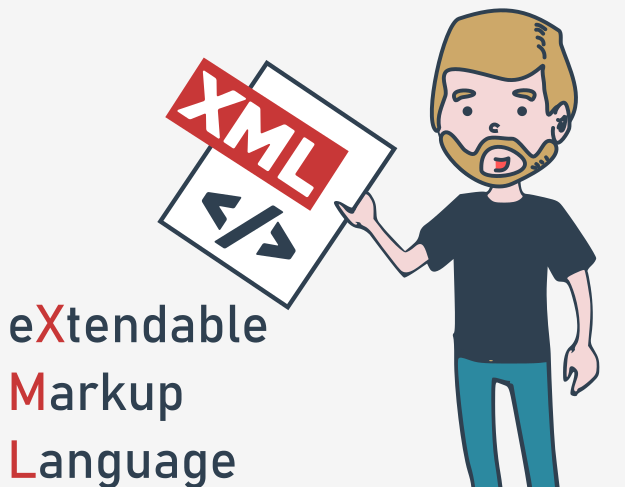

Extendable Markup Language

**XML** is a **language**. Anyway, this is what it thinks about itself. Note – it isn't a programming language, and although it is possible to build a real programming language on top of XML, it wasn't (and still isn't) its native niche. XML is – like JSON – a **universal and transparent carrier** of any type of data. You can use it to store and transfer documents of virtually any type. For example, the document format produced by MS Office applications (the newer one with file extensions ending with x like docx) utilizes XML to create such different data as spreadsheets, presentations, or texts.

As you probably suspect, XML is much older than JSON. Moreover, it's heavier and less flexible. We can even say that XML seems to be bloated compared to JSON.

We’re not going to teach you how to use XML in Python. We only want to show you how it’s built and what the most important differences between XML and JSON are. It can be intriguing how different they are, although both the solutions were invented for nearly the same purpose.

Take a look – it's a simple sample XML document:

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

The document contains a part of an offer published by a very exclusive second-hand car store. It's not a regular store – it's a store with the most legendary cars of all time. Don't expect to be able to buy “just a car” here. They sell special cars for special owner at special prices adjusted to the prestige these cars bring. Moreover, the store has some branches around the world, so your car prices may be expressed in many different currencies.

How does XML cope with such a problem?

Let us lead you through the document and show you some essential aspects.



Let's start with the first line – it plays a very important role:

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

First of all, it **declares that the document contains XML text**. Note the very original “parentheses” in which the line is enclosed: <? and ?> .

As you can see, XML uses **plain text**, and that's what makes it similar to JSON, but we should note that the similarities end at this point.

Note the two phrases built according to the following pattern:

`attribute = value`

The first (header) line contains two attribute names: `version` and `encoding`. We don’t think you’ll have any problem identifying their meaning: the first informs you which **version of the XML** has been used to encode the document (in fact, there are two versions currently in use: 1.0 and 1.1) while the second says how the document's **text is encoded** (as you may expect, UTF-8 is a natural choice here).

Thanks to this line, a program responsible for parsing a file’s content is calm about the future. It knows what to expect next.

The second line isn't very important – do you know why?

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

It's a comment. It means nothing. The XML parser will ignore it completely.

How do we recognize a comment inside the XML document? It's easy: a comment starts with:

`<!--`

and ends with:

`-->`

Simple, isn't it?

The third line is very curious, as it isn't actually XML:

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

In general, XML documents may be built in two ways:

* **the document content isn't defined at all** – we may say that this kind of document is **self-defining**; it's easy but it lacks one very important feature – the parser is not able to check if the document contains all the needed data and whether the data it contains is valid;
the document is equipped with an additional document (or rather a meta-document) which **describes the desired document content**, which remedies the problem caused by the first method; having such a helper, the parser is able to fully check the document's correctness.
The meta-document is a document type definition (hence the `dtd` suffix visible in the third line.

If you want to aggregate your document with its external definition, you should put the `DOCTYPE` line inside your XML document. The definition may be located anywhere: it can be placed beforehand at the target parsing server, or it may be put in any Internet location (in this case the DOCTYPE line contains the full URL/URI of the DTD).

To make a long story short, the DOCTYPE line contains:

* the name of the XML document being defined (`cars_for_sale`);

Name of the XML document

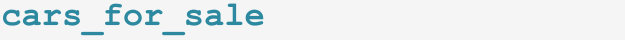

one of two (in XML 1.0) possible keywords: `SYSTEM` or `PUBLIC`; `PUBLIC` means that the DTD is available publicly and its description is determined by two factors: the **FPI** (Formal Public Identifier – a string which uniquely names the DTD on the scale of the universe) and its location (a URI); `SYSTEM` means that the DTD is used privately (to a limited extent, e.g., by one specific organization) and the only information needed about it is its URI (which may be just a file name recognizable by the target server);

Keyword of the XML document

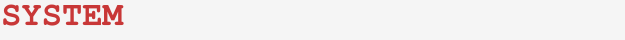

* the **URI** of the DTD.

URI of the DTD of the XML document

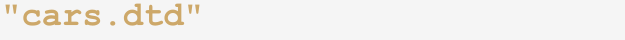

Note: DTDs use a specialized language named SGML in order to fully describe XML document content. We won't deal with it here. It's a separate and very complicated story – sorry.

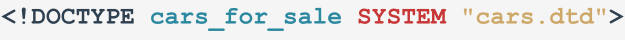


It's a bit ironic that we had to move through three complete lines to finally reach something that is **actually XML**:

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

The XML document consists of **elements**. Each element is marked by a **pair of tags**: an **opening** tag and a **closing** tag. Both tags look nearly identical, but the closing tag's name starts with /. Tags can be easily identified as they are enclosed inside < and >.

This means that the element named `CuriousTag` starts where the following tag is placed:

`<CuriousTag>`

and ends in the same location where the closing tag exists:

`</CuriousTag>`

All the text within these tags is the element's content (or simply element’s text).

Note: there are also **empty elements**, which can be specified in a more comprehensive way. For example, if you need to specify an element like this:

`<empty></empty>`

(note: there is no content between the tags!) you may want to use the shorter form:

`<empty/>`

Be aware that an empty element may not be the same as an absent element – the omission of a particular element may be treated as an error by the parser.


DOCTYPE elements

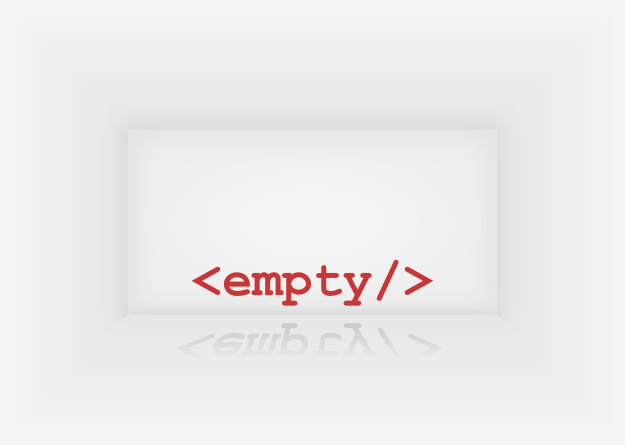

Look at the example – the document contains one **top-level element** (not contained by any other element) named `cars_for_sale`. This is the **root element**, which must occur **exactly once** inside the XML document.

Let's dive into it.

Try to answer the following question: how many cars can you buy here?

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

Yes, two. The answer is obvious as there are **two elements named** `car` inside the root element. Each of them starts with the tag <car> and ends with the tag </car>.

Simple? Yes, indisputably.

Let's get into the car and look around.

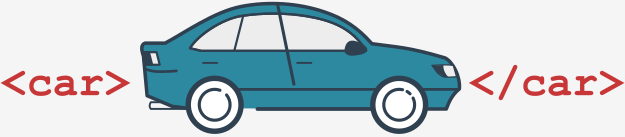

What can we learn about each of the cars?

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

As you can see, the car is described by:

* an `id`, which is (most likely) an integer number; note: XML defines neither primitive types nor literals (while JSON does); anything you want to put inside an XML document has to be defined and interpreted by you; if you use a DTD, you can define some additional syntax for your data, and the XML parser will be ready to honor it, but these steps are taken outside XML land; this is one of the most important distinctions between XML and JSON;
* the `brand`, which is just text – longer or shorter, but still text;
* the `model`, as above;
* the `production year`, which is an integer number from a quite predictable range;
* the `price`, which is (in general) a floating-point number from a completely unpredictable range.
Note: there is something very intriguing inside the opening `<price>` tag – can you see it?

Note, there is something new inside the tag:

```
<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
<cars_for_sale>
   <car>
      <id>1</id>
      <brand>Ford</brand>
      <model>Mustang</model>
      <production_year>1972</production_year>
      <price currency="USD">35900</price>
   </car>
   <car>
      <id>2</id>
      <brand>Aston Martin</brand>
      <model>Rapide</model>
      <production_year>2010</production_year>
      <price currency="GBP">32000</price>
   </car>
</cars_for_sale>
```

This is the **attribute**.

What is this needed for?

Some values are absolute or almost absolute. For example, a year number is a good example of such an absolute value. We can say that most customers from all over the world when told that the car was built in 1972 will know exactly how old the vehicle is.

But if we tell them that it cost 35,900, they'll immediately ask “in which currency?”.

This is why we need attributes. Of course, we can make some specialized tags named, e.g., `<price_in_usd>` or `<price_in_gpb>` but it will be neither easy to parse nor elegant. Attributes work much better here.

As you can see, the `<price>` tag uses one attribute named **currency**. Its value can be taken from an international standard named ISO4217, which can make the record absolutely unequivocal.

We should also add that XML allows us to put **as many attributes inside a tag as we need**.

We hope that XML is clear now, but there is one question that has to be put here: **how do we process XML documents in Python**?

The question (fortunately or not) has more than one answer. Moreover, it involves some further questions, and one of them seems to be particularly interesting – what is the best model of XML document structure?

The question may surprise you: it's a **tree**. Of course, not the one with wide branches and green leaves, but the one which is called a **graph** by mathematicians and computer scientists.

Take a look:

```
cars_for_sale
|
|____ car
|     |_ id:1
|	 |_ brand: Ford
|	 |_ model: Mustang
|	 |_ production_year: 1972
|	 |_ price(USD): 35900
|
|____ car
	|_ id:2
	   |_ brand: Aston Martin
	   |_ model: Rapide
	   |_ production_year: 2010
	   |_ price(GPB): 32500
```

Does it remind you of something? A directory tree on your computer's disk, for example?

Okay. It definitely looks nice, but what can we learn from it?


What can we learn from it?
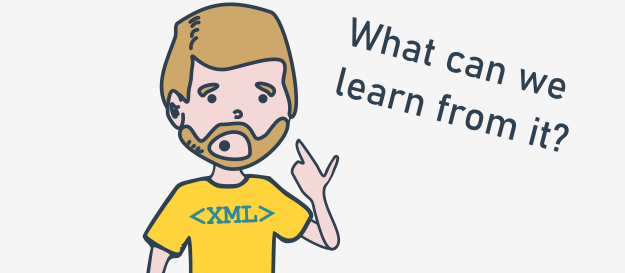



There are many possible Python tools allowing you to create, write, read, parse, and modify XML files. Most of them treat an XML document as a tree consisting of objects, while the objects represent elements.

One of these tools is a package named `xml.etree` and we’re going to show you two simple snippets that make use of it.

Look at the first snippet in the editor.

Cars for sale


Let’s comment on the code:

* line 1: `import` – nothing special;
* line 3: the `parse()` function reads the XML document, builds the tree, and returns it; we use the tree object to invoke its fundamental method named `getroot()` which returns what it promises – the root element of the tree;
* line 4: each tree element (i.e., each object containing the element) has a property named `tag` which stores the textual representation of the element's name – we use it to print the root element's name;
* line 5: now we start to traverse the tree using the `findall()` method of the root object; the method's arguments name the elements we are interested in;
* line 6: we print the `tag`'s (element's) name – yes, we know that it's `car` (we wanted to find it so it isn't surprising)
* line 7: we initiate the iterations which should reveal all `car`'s components
* line 8: we print the found `tag`'s name...
* line 9: ...and if it is `price`...
* line 10: ...we make use of the `attrib` property which is, in fact, a Python dictionary grouping all of `tag`'s attributes (as attributes occur in pairs, a dictionary is the best tool to store them)
* line 11: we print `tag`'s content – it is available as a value returned from the `text` property.

The code produces the following output:

```
cars_for_sale
	 car
		 id = 1
		 brand = Ford
		 model = Mustang
		 production_year = 1972
		 price{'currency': 'USD'} = 35900
    car
		 id = 2
		 brand = Aston Martin
		 model = Rapide
		 production_year = 2010
		 price{'currency': 'GBP'} = 32000
```

In [ ]:
import xml.etree.ElementTree

cars_for_sale = xml.etree.ElementTree.parse('cars.xml').getroot()
print(cars_for_sale.tag)
for car in cars_for_sale.findall('car'):
    print('\t', car.tag)
    for prop in car:
        print('\t\t', prop.tag, end='')
        if prop.tag == 'price':
            print(prop.attrib, end='')
    print(' =', prop.text)


The `xml.etree.ElementTree` module may be also used to create, modify and write XML files.

We’ll use it to remove one car from our offer (theFord Mustang) and add a new car to it – look at the editor and see how we did it.


Rocket sciencist


Some explanations will make the sample code clearer – here they go:

* line 1: no comment needed;
* line 3: parse the file and fetch an object storing all elements – we’ll name it `tree`;
* line 4: find the root of the tree and store it in `cars_for_sale` (in fact, this is the same step as done previously, but divided into two parts)
* line 5: let's traverse the tree...
* line 6: ...in order to search the `car` whose brand name is Ford and its model name is `Mustang`;
* line 7: yes! We've found it! Now we invoke the `remove()` method from within the `car` object and the whole element disappears from the tree;
* line 8: we can leave the loop immediately;
* line 9: we create a brand new and completely empty `car` element – it’s stored inside the `new_car` variable (note: the `Element()` method requires one argument: a string containing the element's (tag's) name;
* lines 10 through 13: we call the `SubElement()` method as many times as the number of sub-elements (the inner tags) we need; each invocation needs **two arguments**: a **parent element object** (`new_car` here) and a **sub-element name** (as a string); note: the function returns an object for the newly created element; in fact, we need it only once, for a very specific purpose: we use it to set the **text** associated with the tag – this is why we access the **text** property and set it with the desired value;
* line 14 is slightly different – can you see it? The invocation contains **one more argument**: a dictionary; the function will use is to embed an attribute (`price`) inside the sub-element;
* line 15: now we’re ready to append the newly created element into the tree, and we do it;
* line 16: the `write()` method invoked from within the tree object creates a new file and fills it with the modified XML document.

As you can see, working with XML doesn't require you to be a rocket scientist, but – if we’re being honest – JSON is more convenient and – last but most important – most currently implemented services use JSON, not XML. It's highly possible that you may encounter a server which implements communication on exchanging XML documents, but JSON is much more popular.

In [ ]:
import xml.etree.ElementTree

tree = xml.etree.ElementTree.parse('cars.xml')
cars_for_sale = tree.getroot()
for car in cars_for_sale.findall('car'):
    if car.find('brand').text == 'Ford' and car.find('model').text == 'Mustang':
        cars_for_sale.remove(car)
        break
new_car = xml.etree.ElementTree.Element('car')
xml.etree.ElementTree.SubElement(new_car, 'id').text = '4'
xml.etree.ElementTree.SubElement(new_car, 'brand').text = 'Maserati'
xml.etree.ElementTree.SubElement(new_car, 'model').text = 'Mexico'
xml.etree.ElementTree.SubElement(new_car, 'production_year').text = '1970'
xml.etree.ElementTree.SubElement(new_car, 'price', {'currency': 'EUR'}).text = '61800'
cars_for_sale.append(new_car)
tree.write('newcars.xml', method='')


#1.6 Making life easier with the requests module

We have reached the point where we can start the final stage of our journey – we know enough to communicate with the web service using JSON as an information carrier. Unfortunately, our knowledge needs to be supplemented – we need a **server serving** a web **service** (sorry for all these serv..., we weren't able to avoid them) and we also need a tool simpler than the `socket` module to talk with the service (we beg your pardon).

“Wait,” you may ask here. “Doesn't the socket module already fit our needs?”

It does, but it’s **too good**. It's too choosy and too powerful. It exposes lots of details which aren't necessary available at the higher levels of software design. The socket module is perfect when you want to understand network issues at the TCP level and to learn which challenges the OS faces when it tries to establish, maintain, and close internet connections. This is why we used it before when we wanted you to enter the world of network communications, but at the same time, the socket is too bloated and too heavy when you just want to have a **little chat** with a web service.

Which of these demands (server or tool) should be satisfied earlier? The server, of course. We need our own, private HTTP server which will work only for us and successfully play the role of a RESTFul API foundation.
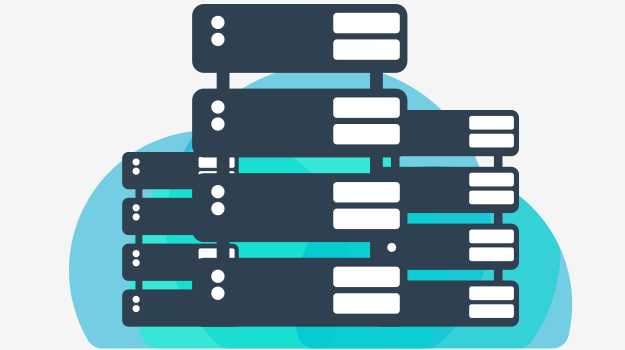

We’ve decided to use a free and open package named `json-server`, implemented on top of the `Node.js` environment. `Node.js` is – as Wikipedia claims – an open-source, cross-platform JavaScript run-time environment that executes JavaScript code outside of a browser. Don't be afraid – we’re going to encounter JavaScript again, but we aren't going to force you to write any code in it. It’ll act as a **black box** for us, and we don't want to persuade you to look inside it.

Okay. Let's start.


node.js logo

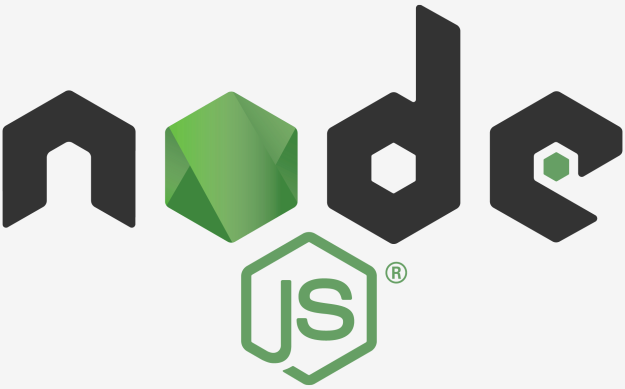

First of all, we need to have Node.js installed on our computer. The steps you should take depend on the OS you use. So...

* ...if you're a Windows user, point your browser to https://nodejs.org/en/download, download and run the Windows installer (a file with a name that looks like `node-vxx.yy.z-x86.msi`) from the LTS (*Long Time Support*) branch; accept all the default settings and let the installer do the job; after successful installation you should see an entry named `Node.js` in the Windows® start menu;
* ...if you're a macOS user, go to the address https://nodejs.org/en/download, download the `pkg` file and run the installer. Whole process looks the same as on Windows® - just accept all the default settings and let the installer do the job;
* ...if you're a Linux user, you have to go to the address https://nodejs.org/en/download/package-manager and obtain some more specific assistance; unfortunately, some Linuxes offer their own, native `Node.js` packages matching the specific system needs, and these packages can be installed using the built-in package manager, while others require manual installation; sorry, we can’t help you with this issue.


The next step is to open your OS console and...

* ...if you're a Windows user, run the **CMD.EXE** program (as an ordinary user) and wait till a black (unless you've changed its color) rectangle appears on the screen;
* if you're a Linux or macOS user, start your favorite terminal emulator (note: administrative rights may be needed and your OS may require it – `sudo` is your friend).
The next steps will be almost the same in all the above platforms.

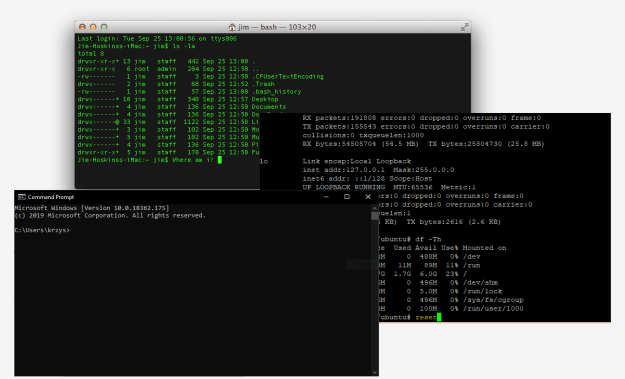

`Node.js` utilizes its own native tool for installing and updating components. Its name is the same under all the platforms covered, so when you issue the following command:

```
npm
```

(which is short for *node.js package manager*) you should see a short help screen similar to the one presented here:

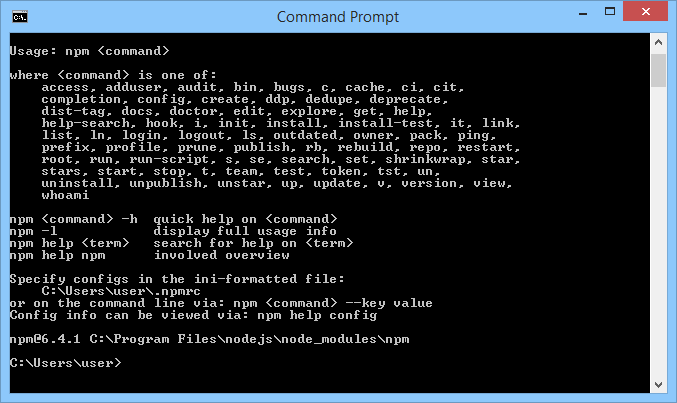

Now we’re going to ask the `npm` to download and install the `json-server` package, along with all the packages needed to run it, so you should expect some delay – be patient and issue the following command:

```
npm install -g json-server
```

After successful installation, your screen should look like ours:

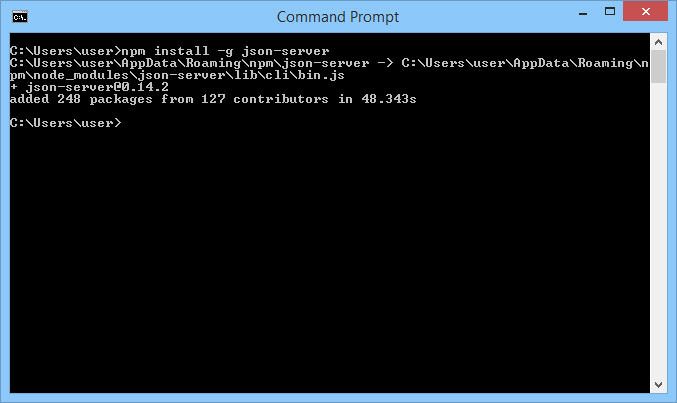

We need to perform a brief test to ensure that the server is operating correctly. Do the following actions:

* download the JSON file `cars.json` from here: [Download cars.json (zip archive)](https://edube.org/uploads/media/default/0001/01/e845c414d155078681778a99015e9fcff1f0c84d.zip) and save it in your home directory or any other directory you have the right to write into;
* return to the system console and issue the following command:

```
json-server --watch cars.json
```

Note: the file name you put after `–-watch` should be specified absolutely, i.e., it has to contain the path leading to the downloaded file. Due to the fact that we’ve placed the file in our home directory (`C:\User\user`), the same directory in which we work during the tests (see the command prompt) we don't need to use the complete path. This doesn't mean you don't need it, either!

If everything went correctly, you'll see the following screen:

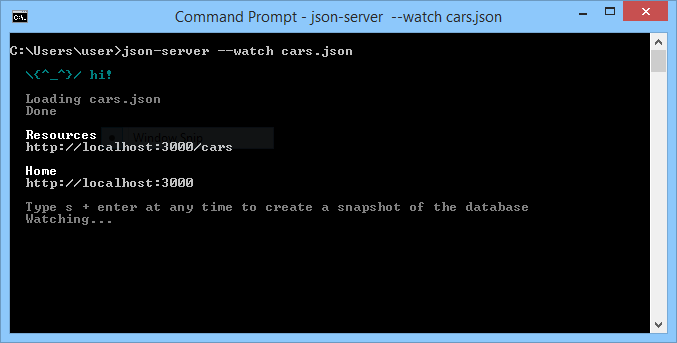

This means that the server is working and is ready to serve incoming connections. Don't let it wait. Let's connect to it!


Now open your favorite Internet browser and type the following URL into the address line:

```
http://localhost:3000
```

This means that you order the browser to connect to **the same machine** you're currently working on (`localhost`) and you want the client to go to the **port number 3000** (`json-server`'s default port).

You should see something like this:

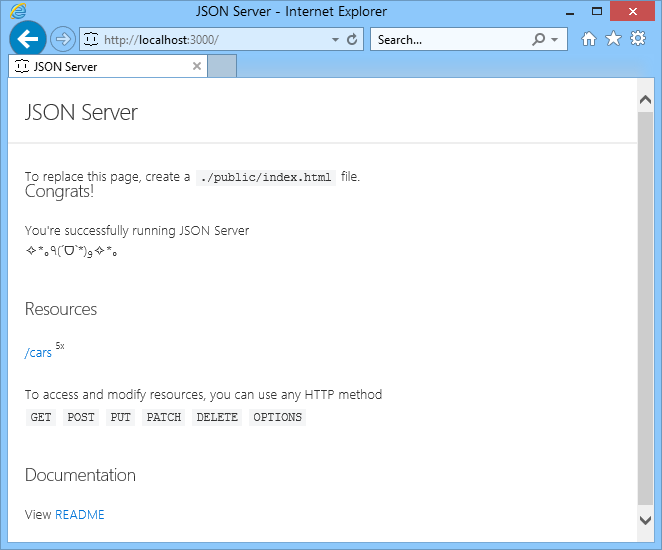

Congratulations! You have your server running and operational!

Press **Crtl-C** in the console if you want to terminate the server, but for now leave it running – we’ll need it and the resources it serves!

We created such a file containing one line:

```
CARS DATABASE
```

Then we switched back to the browser and pressed **F5**. This is what we saw:

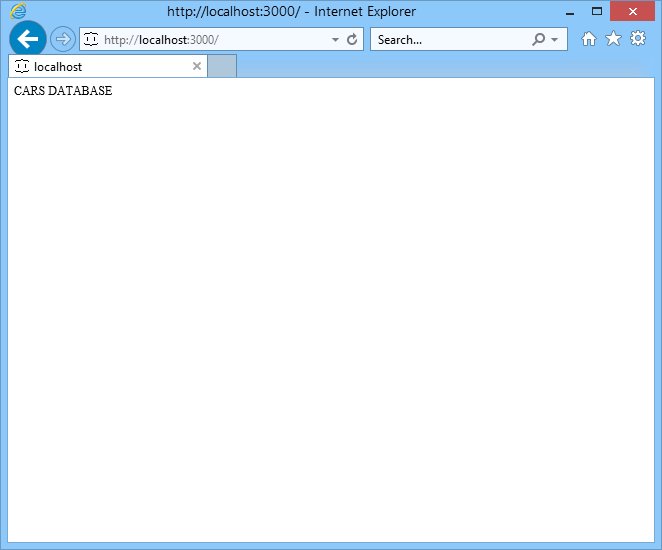

Now we’re well enough equipped to start a discussion on the requests module – let's dive into it!



The first program makes very basic use of the power of the `requests` module. Take a look:

In [ ]:
import requests

reply = requests.get('http://localhost:3000')
print(reply.status_code)

The HTTP protocol operates by using **methods**. We can say that the **HTTP method** is a **two-way interaction between the client and the server** (note: the client initiates the transmission) dedicated to the execution of a certain action. `GET` is one of them, and is used to convince the server to transfer some resources asked for by the client.

A `requests` function named `get()` initiates execution of the HTTP `GET` method and receives the server's response. As you can see, the code is extremely **simple and compact** – we don't need to cope with a myriad of mysterious constants, symbols, functions, and notions.

It's like we said “Hey, server, send me your default resource”.

The only details we need to provide are the **server’s address** and the **service port number** – just like we did while using the browser’s address line. Note: the port number can be omitted if it is equal to **80**, HTTP’s default port.

Of course, it is possible that the server resides somewhere far away from our desk, for example, in the other hemisphere. The only thing we’ll change then is the server address – it would be formed as an IP address or fully qualified domain name (FQDN), but it doesn’t matter for `get()` – its behavior is always the same – it will try to connect the server, form a `GET` request, and accept the answer.

As you can see, the `get()` function returns a result. It’s an **object** containing all the information describing the `GET` method’s execution.

Of course, the most important thing we need to know is whether the `GET` method has **succeeded**. This is why we make use of the `status_code` property – it contains a standardized number describing the server’s response.

If you run the code and everything works as expected, you will see a very short and simple result:

```
200
```

As the HTTP protocol defines it, code 200 means “okay”.

Good news.

All response codes used by HTTP are gathered here: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

The requests module offers many different ways of specifying and recognizing **status codes**.

Look at the code:



In [ ]:
import requests

print(requests.codes.__dict__)

It dumps the contents of a status dictionary. The output is very long and jumbled – we won't put it here, but we encourage you to study it carefully, comparing the values you see with those presented at Wikipedia.

Anyway, you can use the `codes` property to test status codes in a more verbose way than by comparing them to bare integer values. What do you think about such a snippet?


In [ ]:
if reply.status_code == requests.codes.ok:


It looks far better than just `200`, doesn't it?


When you know that the server's **response is correct**, you would like to know **the response itself**, wouldn’t you?

The server's response consists of two parts: the **header** and the **contents**. Both parts have their representation in the object returned by the `get()` function. Let's start with the header.

The response's header is stored inside the property named `headers` (it's a dictionary). Let's take a look at it:



In [ ]:
import requests

reply = requests.get('http://localhost:3000')
print(reply.headers)

The program produces the following output:

```
{'X-Powered-By': 'Express', 'Vary': 'Origin, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Accept-Ranges': 'bytes', 'Cache-Control': 'public, max-age=0', 'Last-Modified': 'Thu, 02 May 2019 12:38:41 GMT', 'ETag': 'W/"e-16a788dd2ec"', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '14', 'Date': 'Thu, 02 May 2019 14:17:27 GMT', 'Connection': 'keep-alive'}
```

As you can see, the response's header consists of a number of fields with associated values (actually, each field occupies one line of the response). Most of them aren't of any interest to us, although some are crucial, e.g., `Content-Type`, which describes what the server response's contents really are.

You can access it directly using a routine dictionary lookup, just like this:

```
reply.headers['Content-Type']
```

The raw response's contents are stored by the text property:

In [ ]:
import requests

reply = requests.get('http://localhost:3000')
print(reply.text)

The property contains bare text taken as-is directly from the data stream, hence it is just a **string**. No conversions are applied.

The code produces the following output:

```
CARS DATABASE
```

Note: when both client and server are aware of the fact that the contents (no matter which part sent them) contain a JSON message, it is also possible to use a method named json() which returns exactly what we may expect – a **dictionary or a list of dictionaries**. We’ll show you that in the next section.



In general, the HTTP protocol defines the following methods:


GET method
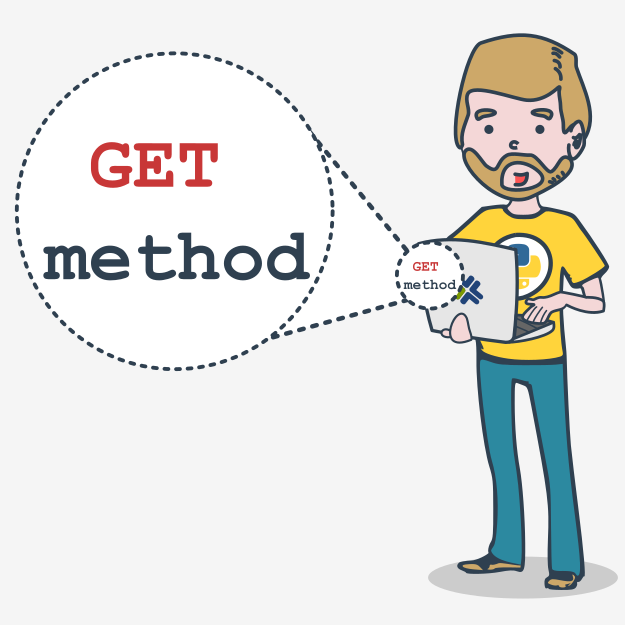

* `GET` is intended to fetch a piece of information (a resource) from the server; of course, a simple server offers more than one resource, so the `GET` method has the means of enabling the client to precisely specify its demands; if the client has no demands and initiates `GET` without resource identification, the server's answer will contain the **root document** – this is exactly what we saw some time ago, when our own server sent us this simple text `CARS DATABASE`.
* in other words – if you want the server to give you something, `GET` is the way to ask for it.

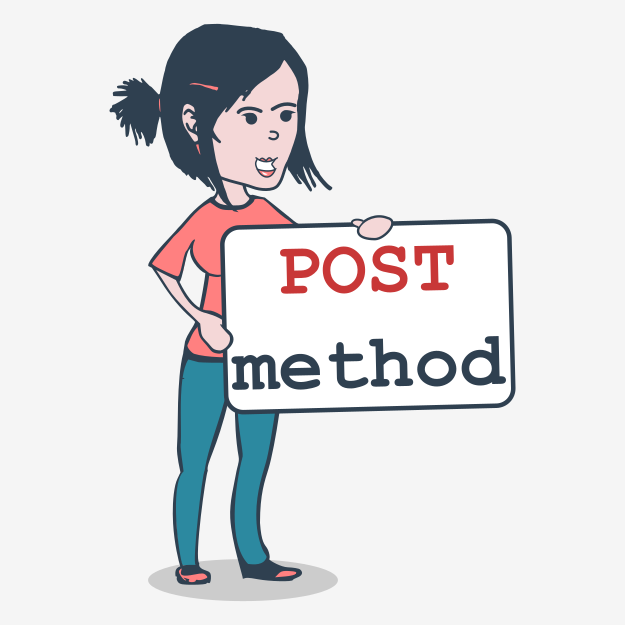
* `POST`, like `GET`, is used to transfer a resource, but in the opposite direction: from the client to the server; just like in `GET`, the identification of the resource has to be given (the server wants to know what to name the piece of information it has received); it is also assumed that the resource the client sends is **new to the server** – it doesn't replace or overwrite any of the previously collected data;
* to make a long story short – if you want to give the server something new, `POST` is ready to be your deliverer.

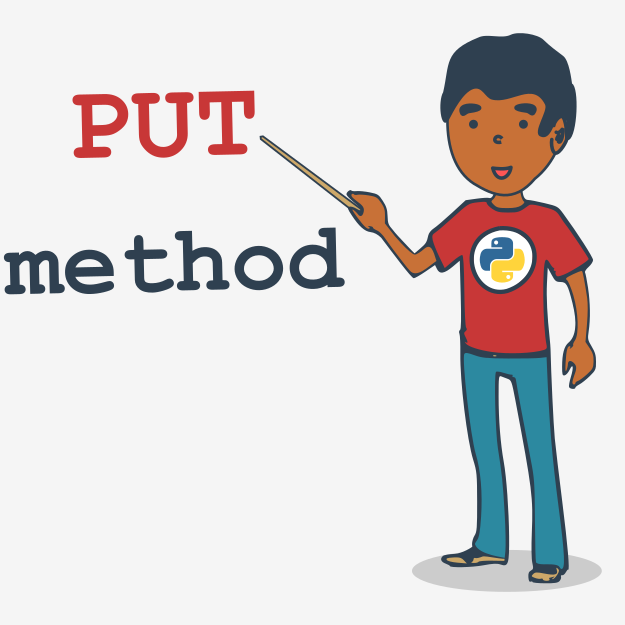

* `PUT`, similarly to `POST`, transfers a resource from the client to the server, but the **intention is different** – the resource being sent is intended to **replace** the previously stored data;
* simply put – if you want to update something that the server is currently keeping, `PUT` will know the way.


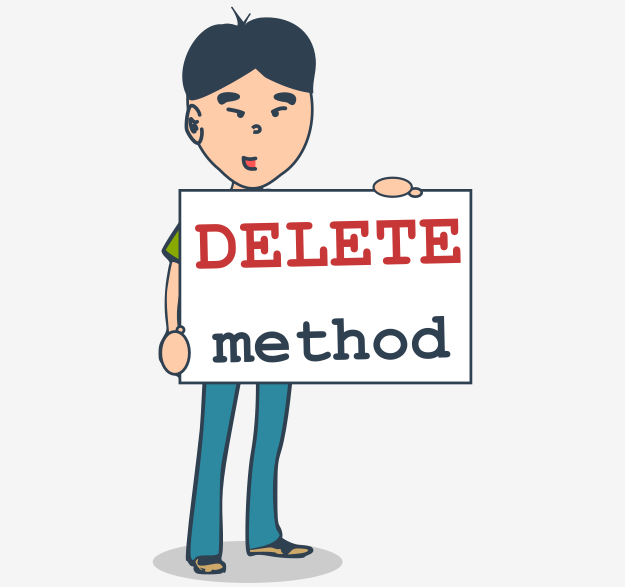

* `DELETE` – this name leaves no doubt: it is used to order the server to remove a resource from a given identification; the resource is unavailable from then on;
* we’re sorry, but there is no simpler way to explain that, we think; we aren't wrong, are we?

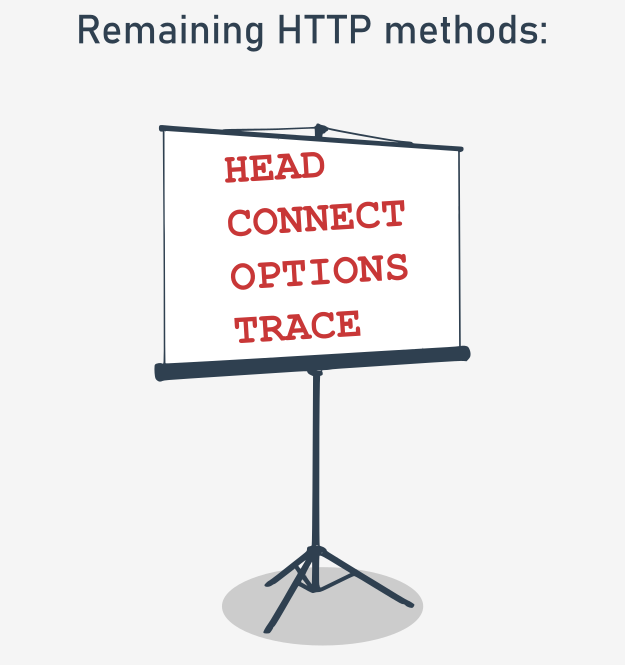

We aren't going to discuss them here, but feel free to deepen your knowledge by yourself.



As you probably suspect, all the listed HTTP methods have their reflections (or rather siblings) within the requests module.

Yes, you're absolutely right:


REQUESTS module
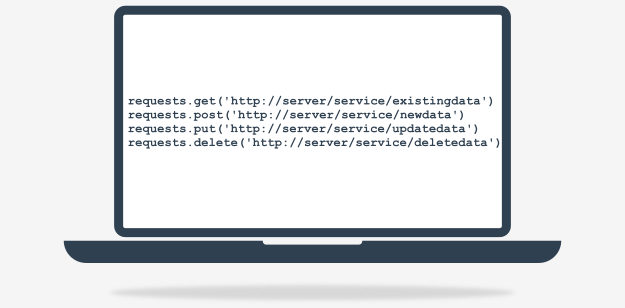

The diagram, although extremely simplified and deprived of important details, shows us the most important tools we’ll use soon to play a game with our server. Don't be afraid, we'll acquaint you with all additional means and arguments.


It seems that we missed one important issue: what’ll happen if **anything goes wrong**? The server may fail, transmission media may be down, etc, etc, etc. How do we defend against all these miseries?

All `requests` functions are in the habit of raising an exception when they encounter any kind of communication problem, although some of the problems seem to be more common than others.

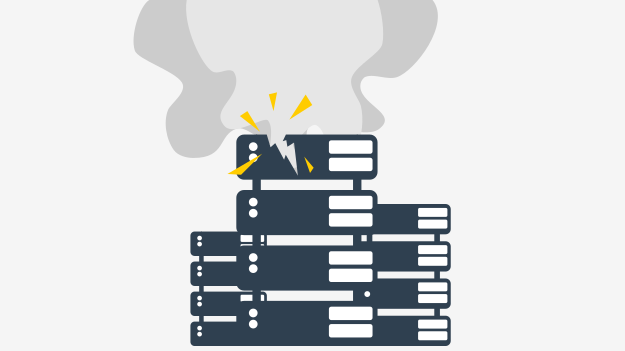

For example, let's take a look at a crucial issue named `timeout`.

It's normal for the server not to respond immediately – making connections, transmitting data, searching resources – all these steps take time. Okay, we know that, but our patience is limited, too. Usually, we know very well how long we agree to wait and don't want to wait any longer. Can our expectations be met?

Of course they can, and one exception will be very helpful – look:

In [ ]:
import requests

try:
    reply = requests.get('http://localhost:3000', timeout=1)
except requests.exceptions.Timeout:
    print('Sorry, Mr. Impatient, you didn\'t get your data')
else:
    print('Here is your data, my Master!')


As you can see, the `get()` function takes one additional argument named `timeout` – it's the maximum time (measured in seconds and expressed as a real number) we agree to wait for a server's response. If the time is exceeded, `get()` will raise an exception named `requests.exceptions.Timeout`.

If the server is ready and not very busy, one second is more than enough to process such a simple request, so you should expect good news – the program will write:

```
Here is your data, my Master!
```

But if you change the timeout radically to a disturbingly small value like 0.00001, it's highly probable that you will have to endure the following bad news:

```
Sorry, Mr. Impatient, you didn't get your data.
```

Of course, **problems may appear much earlier**, e.g., while establishing the connection:



In [ ]:
import requests

try:
    reply = requests.get('http://localhost:3001', timeout=1)
except requests.exceptions.ConnectionError:
    print('Nobody\'s home, sorry!')
else:
    print('Everything fine!')

This code has no chance of running properly – it’s addressing its efforts to port **3001**, while our server is listening at port **3000**. No helping hand will fix this misunderstanding – client and server won't meet and an **exception will be raised**. Its name is:

```
requests.exceptions.ConnectionError
```

To err is human, so it is also possible that you or another developer may leave the resource’s URI in a somewhat malformed state. Look at the code in the editor window.


Invalid URL
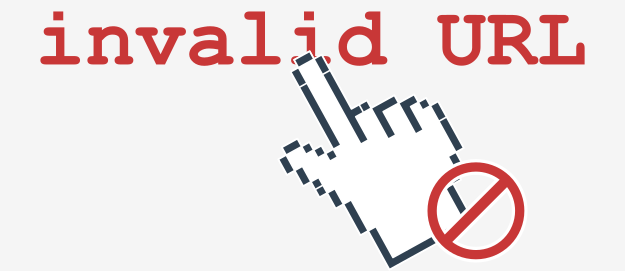

Disasters of this kind are served by an exception named:

```
requests.exceptions.InvalidURL
```

We’ve gathered all the requests exceptions in one place and presented them as a tree – this is what it looks like:

```
RequestException
|___HTTPError
|___ConnectionError
|   |___ProxyError
|   |___SSLError
|___Timeout
|   |___ConnectTimeout
|   |___ReadTimeout
|___URLRequired
|___TooManyRedirects
|___MissingSchema
|___InvalidSchema
|___InvalidURL
|   |___InvalidProxyURL
|___InvalidHeader
|___ChunkedEncodingError
|___ContentDecodingError
|___StreamConsumedError
|___RetryError
|___UnrewindableBodyError
```
Something nice for everyone.

Now that we are well acquainted with the world of `requests`, we can take the next step and enter the world of web services. Are you ready?





In [ ]:
import requests

try:
    reply = requests.get('http:////////////')
except requests.exceptions.InvalidURL:
    print('Recipient unknown!')
else:
    print('Everything fine!')


#1.7 Four magic letters: CRUD

##Entering a non-existing/malformed address
We’ve reached the point in which we are ready to gather all new facts and tools and glue all these pieces into one functional block. You already know how HTTP works, how it’ is mounted on top of the TCP stack and how the HTTP server is able to do much more for us than just store and publish fancy images and funny videos.

In fact, a properly trained web server can be a very **effective and convenient gateway** to very complicated and heavy databases or other services designed for storing and processing information. Moreover, the structure of the database (or the service) may vary, e.g., it may be a simple relational database residing in a single file, or on the contrary, a huge, distributed cloud of cooperating servers; but the interface provided to the user (you) will always look the same.

We can say that that's what REST was invented for. Thanks to it, very different programs written in very different technologies can utilize shared data through one, **universal interface**.

The interface itself enables the user to perform a basic set of operations – they are elementary, but complex enough to build complex services. A set of four operations hides beneath the following mysterious acronym:

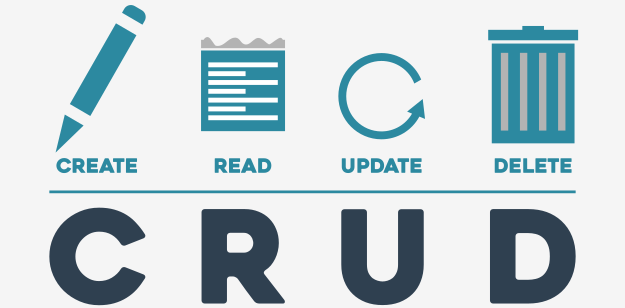

Note – this is a four-letter acronym which makes it really special. Let's shed some light on it.

##C means Create
If you are able to “create”, you can add new items to data collection, for example, write a new blog post, add a new picture to the gallery, store a new client's data in a customer database, etc.

At REST level, the creation of new items is implemented by the `POST` HTTP method.


##R means Read or, if you prefere, retrieve
Reading/retrieving is the very basic ability to browse data stored in a collection, e.g., reading posts on somebody's blog, viewing pictures in a gallery, studying customers' records in a database, etc.

At REST level, the retrieving of items is implemented by the GET HTTP method.


##U means Update
You update data inside a collection when you modify the contents of the selected item without removing it, e.g., you edit your blog post, resize a picture in the gallery, enter the current customer’s sales information, etc.

At REST level, updating existing data is implemented by the `PUT` HTTP method.


##To make our set complete, we need D for Delete.
Deletion occurs when you remove your post from the blog, purge a picture from the gallery or cancel a customer’s account.

At REST level, deleting existing data is implemented by the `DELETE` HTTP method.

Now we’re ready to carry out some simple but instructive experiments with JSON. We’ll use it as an intermediate language to communicate with the HTTP server, implementing CRUD and storing a sample collection of data.

These are our assumptions:

* we'll make use of the previously presented `json-server` – we'll try to get it to work hard with all four letters making up CRUD;
* our initial database, processed on our demands by the `json-server`, will be a collection of retro cars written down in the `cars.json` file (Download [cars.json zip file](https://edube.org/files/download/931)); the json-server will read the file in and will handle its contents according to our actions;
* each car is described by:
>`id` – a unique item number; note – each item in the collection must have the property of this name – this is how the server identifies each item and differentiates the items from each other;
>`brand` – a string;
>`model` – a string;
>`production_year` – an integer number;
>`convertible` – a Boolean value;

* the initial file contains data for six cars – don't be surprised if the server modifies its contents; if you want to reset the collection to the initial state, stop the server (use **Ctrl-C** for this purpose), replace the file with its original version (you can always download it from our site) and start the server again.

We’re ready to start now. Open the console, locate the directory where your cars.json is located and launch the server:

json-server --watch cars.json

**Note (very important)** – the fact that the `json-server` serves the data initially encoded as JSON has absolutely nothing to do with the fact that we will transmit JSON messages between the client (our code) and the server (`json-server`). The way the server is used to initialize and store data is actually a black-box for us (unless we are implementing the server itself). Different servers may use different means – it's none of our business when we are the clients.

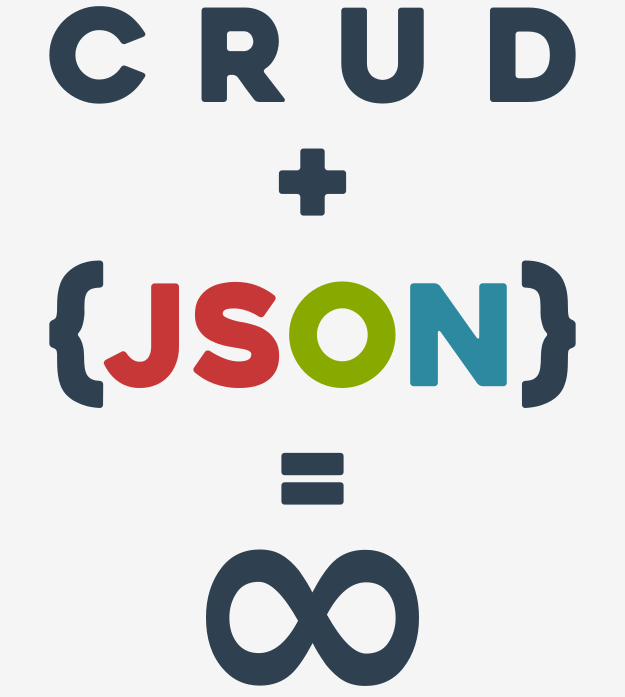

We'll start our journey with the letter **R (read)**. We’ll try to convince the server to show us all the cars it offers.

Note: `json-server` assumes that the data collection inherits its name from the source data file name. As we named the file `cars`, the server will publish the data as `cars`, too. You have to use the name in the URI unless you want to get the default (root) document, which is completely useless to us.


Look at the code in the editor. It's very basic so far, but will grow soon – we promise:

* line 1: we import the `requests` module;
* line 3: we’re going to connect to the server inside the `try` block – this will allow us to protect ourselves against the possible effects of connection problems;
* line 4: we form the `GET` request and address it to the resource named `cars` located at the server working at the address specified as `localhost`, listening at port number 300;
* line 5: have we succeeded?
* line 6: unfortunately, we have failed; it seems that the server isn't working, or is inaccessible;
* line 8: good news – the server's responded! Let's check the status code;
* line 9: we print the data the server has sent us (rather boring); the response's contents are stored as a text property of the response object;
* line 11: bad news – the server likes neither us nor our request.

If everything goes well, we should see the full contents of the `cars.json` file printed on the screen. Of course, this is not a very special achievement, but now we’re sure that the server is ready to serve us, and we are ready to command it.

In [ ]:
import requests

try:
    reply = requests.get("http://localhost:3000/cars")
except requests.RequestException:
    print("Communication error")
else:
    if reply.status_code == requests.codes.ok:
        print(reply.text)
    else:
        print("Server error")


Communication error


The HTTP server is able to transfer virtually any kind of data: text, image, video, sound, and many others. The question we have to face and to answer is: how do we **recognize that we’ve actually got the JSON message**?

Yes, of course, it’s obvious that we received what we expected, but it’s rather impossible to install “naked eye” into each piece of client code. Fortunately, there is a simpler way to resolve this issue. The server response's header contains a field named `Content-Type`. The field's value is analyzed by the `requests` module, and if its value announces JSON, a method named `json()` returns the string containing the received message.

We've modified the code a bit - look into the editor and analyze the lines:

Line 9: we print the `Content-Type` field's value;

Line 10: we print the text returned by the `json()` method.

This is what we've got:

```
application/json; charset=utf-8
[{'id': 1, 'brand': 'Ford', 'model': 'Mustang', 'production_year': 1972, 'convertible': False}, {'id': 2, 'brand': 'Chevrolet', 'model': 'Camaro', 'production_year': 1988, 'convertible': True}, {'id': 3, 'brand': 'Aston Martin', 'model': 'Rapide', 'production_year': 2010, 'convertible': False}, {'id': 4, 'brand': 'Maserati', 'model': 'Mexico', 'production_year': 1970, 'convertible': False}, {'id': 5, 'brand': 'Nissan', 'model': 'Fairlady', 'production_year': 1974, 'convertible': False}, {'id': 6, 'brand': 'Mercedes Benz', 'model': '300SL', 'production_year': 195 q7, 'convertible': True}]
```

Note the line starting with `application/json` – this is a premise used by the `requests` module to diagnose the response's contents.
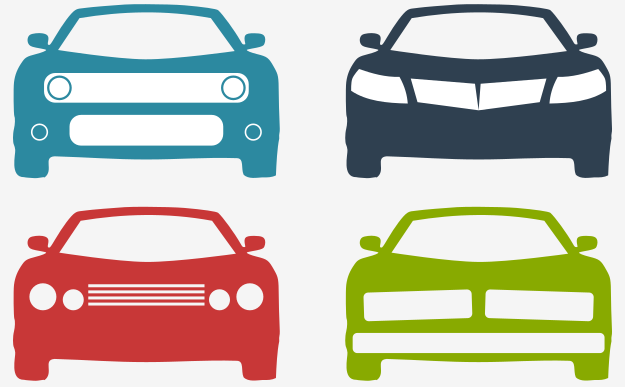

In [ ]:
import requests

try:
    reply = requests.get("http://localhost:3000/cars")
except:
    print("Communication error")
else:
    if reply.status_code == requests.codes.ok:
        print(reply.headers['Content-Type'])
        print(reply.json())
    else:
        print("Server error")


Reading raw JSON messages isn't a lot of fun. To be honest, it's not fun at all. Let's make things a bit more fun, and write some uncomplicated code to present server responses in an elegant and clear way.

Look at the code in the editor. This is our attempt at this ambitious challenge.

Let's analyze it:

* Line 3: we've collected all the properties' names in one place – we’ll use them to perform look-ups through JSON data and to print a beautiful header line over the table;
* Line 4: these are the widths occupied by the properties;
* Line 7: we’ll use this function to print the table's header;
* Line 8: we iterate through key_names and key_widths coupled together by the `zip()` function;
* Line 9: we print each property's name expanded to the desired length and put a bar at the end;
* Line 10: it's time to complete the header line;
* Line 13: we’ll use this function to print one line filled with each car's data;
* Line 14: the iteration is exactly the same as in `showhead()`, but...
Line 15: ...we print the selected property value instead of the column title;
* Line 19: we’ll use this function to print the contents of the JSON message as a list of items;
* Line 20: we’re going to present the user with a charming table with a header...
* Line 21 and 19: ...and a dataset of all the cars from the list, one car per line;
* Line 31: we make use of our brand new code here.

The output looks as follows now:

```
id        | brand          | model     | production_year     | convertible    |
1         | Ford           | Mustang   | 1972                | False          |
2         | Chevrolet      | Camaro    | 1988                | True           |
3         | Aston Martin   | Rapide    | 2010                | False          |
4         | Maserati       | Mexico    | 1970                | False          |
5         | Nissan         | Fairlady  | 1974                | False          |
6         | Mercedes Benz  | 300SL     | 1957
```           

In [ ]:
import requests

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    for car in json:
        show_car(car)


try:
    reply = requests.get('http://localhost:3000/cars')
except requests.RequestException:
    print('Communication error')
else:
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    else:
        print('Server error')


If you don't need all the contents of the resource, you can prepare a specific `GET` request which requires only one item and uses id as a key. A URI looks like this then:

```
http://server:port/resource/id
```

We’re going to test it now but our code needs some improvement to behave properly – look at the code in the editor. Let's analyze it:

Lines 26 through 34: we must be prepared for the fact that the server won't send a list of items if we ask for one.

Lines 44 through 45: if there is no item of the requested `id`, the server will set the status code to `404` (“not found”) – this is how we handle this issue.

Note the URI we used there.

The program prints:
```
id        | brand          | model     | production_year     | convertible    |
2         | Chevrolet      | Camaro    | 1988                | True           |
```

Try to change the `id` and test the program's behavior.

In [ ]:
import requests

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if type(json) is list:
        for car in json:
            show_car(car)
    elif type(json) is dict:
        if json:
            show_car(json)
        else:
            show_empty()


try:
    reply = requests.get('http://localhost:3000/cars/2')
except requests.RequestException:
    print('Communication error')
else:
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    elif reply.status_code == requests.codes.not_found:
        print("Resource not found")
    else:
        print('Server error')


A particular server **may provide some additional facilities e.g., it may manipulate data before sending it to the client**. The `json-server` is able to sort the items using any of the properties as a sort key (by default, it sorts items by their ids). Usually, the URI does the trick, but remember that there is no common standard covering such additional functions – consult the server's documentation to learn more.

The `json-server` assumes that a URI formed in the following way:

```
http://server:port/resource?_sort=property
```

causes the response to be sorted in ascending order using a property named `prop`. Note the `?` character – it separates the resource identification from additional request parameters.

Let's try it. Look at the code in the editor (the lines we've changed: lines 37 through 47).

We've got the following output:

The output looks as follows now:
```
id        | brand          | model     | production_year     | convertible    |
6         | Mercedes Benz  | 300SL     | 1957                | True           |
4         | Maserati       | Mexico    | 1970                | False          |
1         | Ford           | Mustang   | 1972                | False          |
5         | Nissan         | Fairlady  | 1974                | False          |
2         | Chevrolet      | Camaro    | 1988                | True           |
3         | Aston Martin   | Rapide    | 2010           
```

In [ ]:
import requests

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if type(json) is list:
        for car in json:
            show_car(car)
    elif type(json) is dict:
        if json:
            show_car(json)
        else:
            show_empty()


try:
    reply = requests.get('http://localhost:3000/cars?_sort=production_year')
except requests.RequestException:
    print('Communication error')
else:
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    elif reply.status_code == requests.codes.not_found:
        print("Resource not found")
    else:
        print('Server error')


The `json-server` is also able to reverse the sort order – you just have to rewrite theURI in the following way:

```
http://server:port/resource?_sort=property&_order=desc
```

Note the `&` character – it separates additional request parameters from each other.

The amended code is in the editor.

And here's the output:

```
id        | brand          | model     | production_year     | convertible    |
3         | Aston Martin   | Rapide    | 2010                | False          |
2         | Chevrolet      | Camaro    | 1988                | True           |
5         | Nissan         | Fairlady  | 1974                | False          |
1         | Ford           | Mustang   | 1972                | False          |
4         | Maserati       | Mexico    | 1970                | False          |
6         | Mercedes Benz  | 300SL     | 1957                | True           |
```

Some servers can do much more, e.g., they can perform full-text searches, make slices, or analyze complex filtering expressions. The sky’s the limit.



In [ ]:
import requests

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if type(json) is list:
        for car in json:
            show_car(car)
    elif type(json) is dict:
        if json:
            show_car(json)
        else:
            show_empty()


try:
    reply = requests.get('http://localhost:3000/cars?_sort=production_year&_order=desc')
except requests.RequestException:
    print('Communication error')
else:
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    elif reply.status_code == requests.codes.not_found:
        print("Resource not found")
    else:
        print('Server error')


By default, a server implementing **HTTP version 1.1** works in the following manner:

- it **waits** for the client's connection;

- it **reads** the client's request;

- it **sends** its response;

- it **keeps** the connection **alive**, waiting for the client's next request;

- if the client is **inactive for some time**, the server silently closes the connection; this means that the client is obliged to set up a new connection again if it wants to send another request.

The server informs the client whether the connection is kept or not by using a field named Connection, placed in the response's header.

Look at the code in the editor. Let's check it (note line 37).

The program prints:

```
Connection=keep-alive
```

`close` means that the server is going to close the connection as soon as the response is fully transmitted (this was the server’s default behavior in HTTP 1.0).

If the client knows that it won't bother the server with subsequent requests for some time, it may encourage the server to temporarily change its habits and close the connection immediately. It will conserve the server's resources.

How do we do that?

In [ ]:
import requests

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if type(json) is list:
        for car in json:
            show_car(car)
    elif type(json) is dict:
        if json:
            show_car(json)
        else:
            show_empty()


try:
    reply = requests.get('http://localhost:3000/cars')
except requests.RequestException:
    print('Communication error')
else:
    print('Connection=' + reply.headers['Connection'])
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    elif reply.status_code == requests.codes.not_found:
        print("Resource not found")
    else:
        print('Server error')


Now we’re going to switch letters and make R our current hero. We'll show you how to delete a car from our offer.

As you already know, this is done by using the **DELETE** method, which is covered by the `delete()` function. Moreover, we'll do something more – we’ll divide our action into two stages:

1. we'll ask the server to delete one car of a specified id knowing that the server will keep the connection alive;

2. we’ll ask the server to present the current contents of the offer while suggesting that the connection should be closed immediately after the transmission.

Analyze the code in the editor:

Line 37: we prepare our own request header which will supplement the default one that is silently being sent along with each request – it's a dictionary with the key `Connection` (this is the same name as the one sent by the server) and the value set to `Close`; we’ll send it to the server soon;

Line 39: we make use of `delete()` – note the URI which describes the item to delete;

Line 40: we print the server's status code;

Line 41: we ask the server to show us the complete car list, but we also send our request to close the connection – this is done by setting a parameter named `headers`;

Line 46: we'd like to check if the server has honored our recommendation.

And this is our output:
```
res=200
Connection=close
id        | brand          | model     | production_year     | convertible    |
2         | Chevrolet      | Camaro    | 1988                | True           |
3         | Aston Martin   | Rapide    | 2010                | False          |
4         | Maserati       | Mexico    | 1970                | False          |
5         | Nissan         | Fairlady  | 1974                | False          |
6         | Mercedes Benz  | 300SL     | 1957                | True           |
```

As you can see, the deletion was successful (there is no car with `id 1` in the list), the server responded with `200` (“okay”) and complied with our request.

In [ ]:
import requests

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if type(json) is list:
        for car in json:
            show_car(car)
    elif type(json) is dict:
        if json:
            show_car(json)
        else:
            show_empty()


headers = {'Connection': 'Close'}
try:
    reply = requests.delete('http://localhost:3000/cars/1')
    print("res=" + str(reply.status_code))
    reply = requests.get('http://localhost:3000/cars/', headers=headers)
except requests.RequestException:
    print('Communication error')
else:
    print('Connection=' + reply.headers['Connection'])
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    elif reply.status_code == requests.codes.not_found:
        print("Resource not found")
    else:
        print('Server error')


Let's add a new car to our offer. It means that now we’ll invite the letter C onto the stage. Adding a new item means that we’ll have to send the item to the server. Be careful, as this will require some additional steps.

The new steps are encoded in line 1, and lines 21 through 53:

Line 1: we add `json` to the import list – we’ll need it to make a textual representation of the new item/car;

Line 39: if we’re going to send anything to the server, the server must be aware of what it actually is; as you already know, the server informs us about the type of the contents using the `Content-Type` field; we can use the same technique to warn the server that we’re sending something more than a bare request. This is why we prepare our `Content-Type` field with the appropriate value;

Line 40: look! This is our new car! We prepared all the data needed and packed it inside a Python dictionary – of course, we'll convert it into JSON before we send it out into the world;

Line 45: we want to check how the resulting JSON message looks – prevention is better than a cure;

Line 47: this is where the most important things happen – we invoke the `post()` function (note the URI – it just points to the resource, not the particular item) and set two additional parameters: one (`headers`) to complement the request header with the `Content-Type` field, and the second (`data`) to pass the JSON message to the request.

Keep your fingers crossed as we’re going to run it now.

This is the output:
```
{"id": 7,"brand":"Porsche","model":"911","production_year":1963,"convertible":false}
reply=201
Connection=close
id        | brand          | model     | production_year     | convertible    |
2         | Chevrolet      | Camaro    | 1988                | True           |
3         | Aston Martin   | Rapide    | 2010                | False          |
4         | Maserati       | Mexico    | 1970                | False          |
5         | Nissan         | Fairlady  | 1974                | False          |
6         | Mercedes Benz  | 300SL     | 1957                | True           |
7         | Porsche        | 911       | 1963                | False          |
```

Wow! It worked! What a joy! Note the server's status code – it's `201` ("created").



In [ ]:
import json
import requests

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if type(json) is list:
        for car in json:
            show_car(car)
    elif type(json) is dict:
        if json:
            show_car(json)
        else:
            show_empty()


h_close = {'Connection': 'Close'}
h_content = {'Content-Type': 'application/json'}
new_car = {'id': 7,
           'brand': 'Porsche',
           'model': '911',
           'production_year': 1963,
           'convertible': False}
print(json.dumps(new_car))
try:
    reply = requests.post('http://localhost:3000/cars', headers=h_content, data=json.dumps(new_car))
    print("reply=" + str(reply.status_code))
    reply = requests.get('http://localhost:3000/cars/', headers=h_close)
except requests.RequestException:
    print('Communication error')
else:
    print('Connection=' + reply.headers['Connection'])
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    elif reply.status_code == requests.codes.not_found:
        print("Resource not found")
    else:
        print('Server error')


The last remaining letter is U, so now we'll update one of the existing items. Updating an item is actually similar to adding one.

Take a look at the code in the editor. Let's analyze it.

Line 33: the header is the same as previously, as we'll send `json` to the server;

Lines 34 through 38: this is the new data for the item with `id` equal to `6`; note – we've updated the production year (it should be 1967 instead of 1957)

Line 40: now we invoke the `put()` function; note – we have to make a URI that clearly indicates the item being modified; moreover, we must send the complete item, not only the changed property.

And this is what we see on the screen:
```
reply=200
Connection=close
id        | brand          | model     | production_year     | convertible    |
2         | Chevrolet      | Camaro    | 1988                | True           |
3         | Aston Martin   | Rapide    | 2010                | False          |
4         | Maserati       | Mexico    | 1970                | False          |
5         | Nissan         | Fairlady  | 1974                | False          |
6         | Mercedes Benz  | 300SL     | 1967                | True           |
7         | Porsche        | 911       | 1963   
```

Congratulations! The update was fully successful!

Moreover, we’ve completed our trip through the lands of CRUD and REST. It was a long but very satisfactory journey.

In [ ]:
import requests, json

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]


def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if type(json) is list:
        for car in json:
            show_car(car)
    elif type(json) is dict:
        if json:
            show_car(json)
        else:
            show_empty()


h_close = {'Connection': 'Close'}
h_content = {'Content-Type': 'application/json'}
car = {'id': 6,
       'brand': 'Mercedes Benz',
       'model': '300SL',
       'production_year': 1967,
       'convertible': True}
try:
    reply = requests.put('http://localhost:3000/cars/6', headers=h_content, data=json.dumps(car))
    print("res=" + str(reply.status_code))
    reply = requests.get('http://localhost:3000/cars/', headers=h_close)
except requests.RequestException:
    print('Communication error')
else:
    print('Connection=' + reply.headers['Connection'])
    if reply.status_code == requests.codes.ok:
        show(reply.json())
    elif reply.status_code == requests.codes.not_found:
        print("Resource not found")
    else:
        print('Server error')


#2.1 Python Professional Course Series: Lab & Assessment

**Working with RESTful APIs: Lab & Assessment**


Well done, you've reached the end of the course!

In this section, it's time to translate your Python skills and everything you've learned about RESTful APIs into some real-world projects. Specifically, we'll ask you to create:

* an HTTP server availability checker;
* a Vehicle data decoder/encoder;
* a Stock Exchange viewer;
* a Vintage Cars database.
You will also have a chance to do the quiz and the final test to see how well you've mastered the material, and check if you're prepared for the certification exam (available soon).

Completing the quiz and the final test concludes the course. Are you ready?
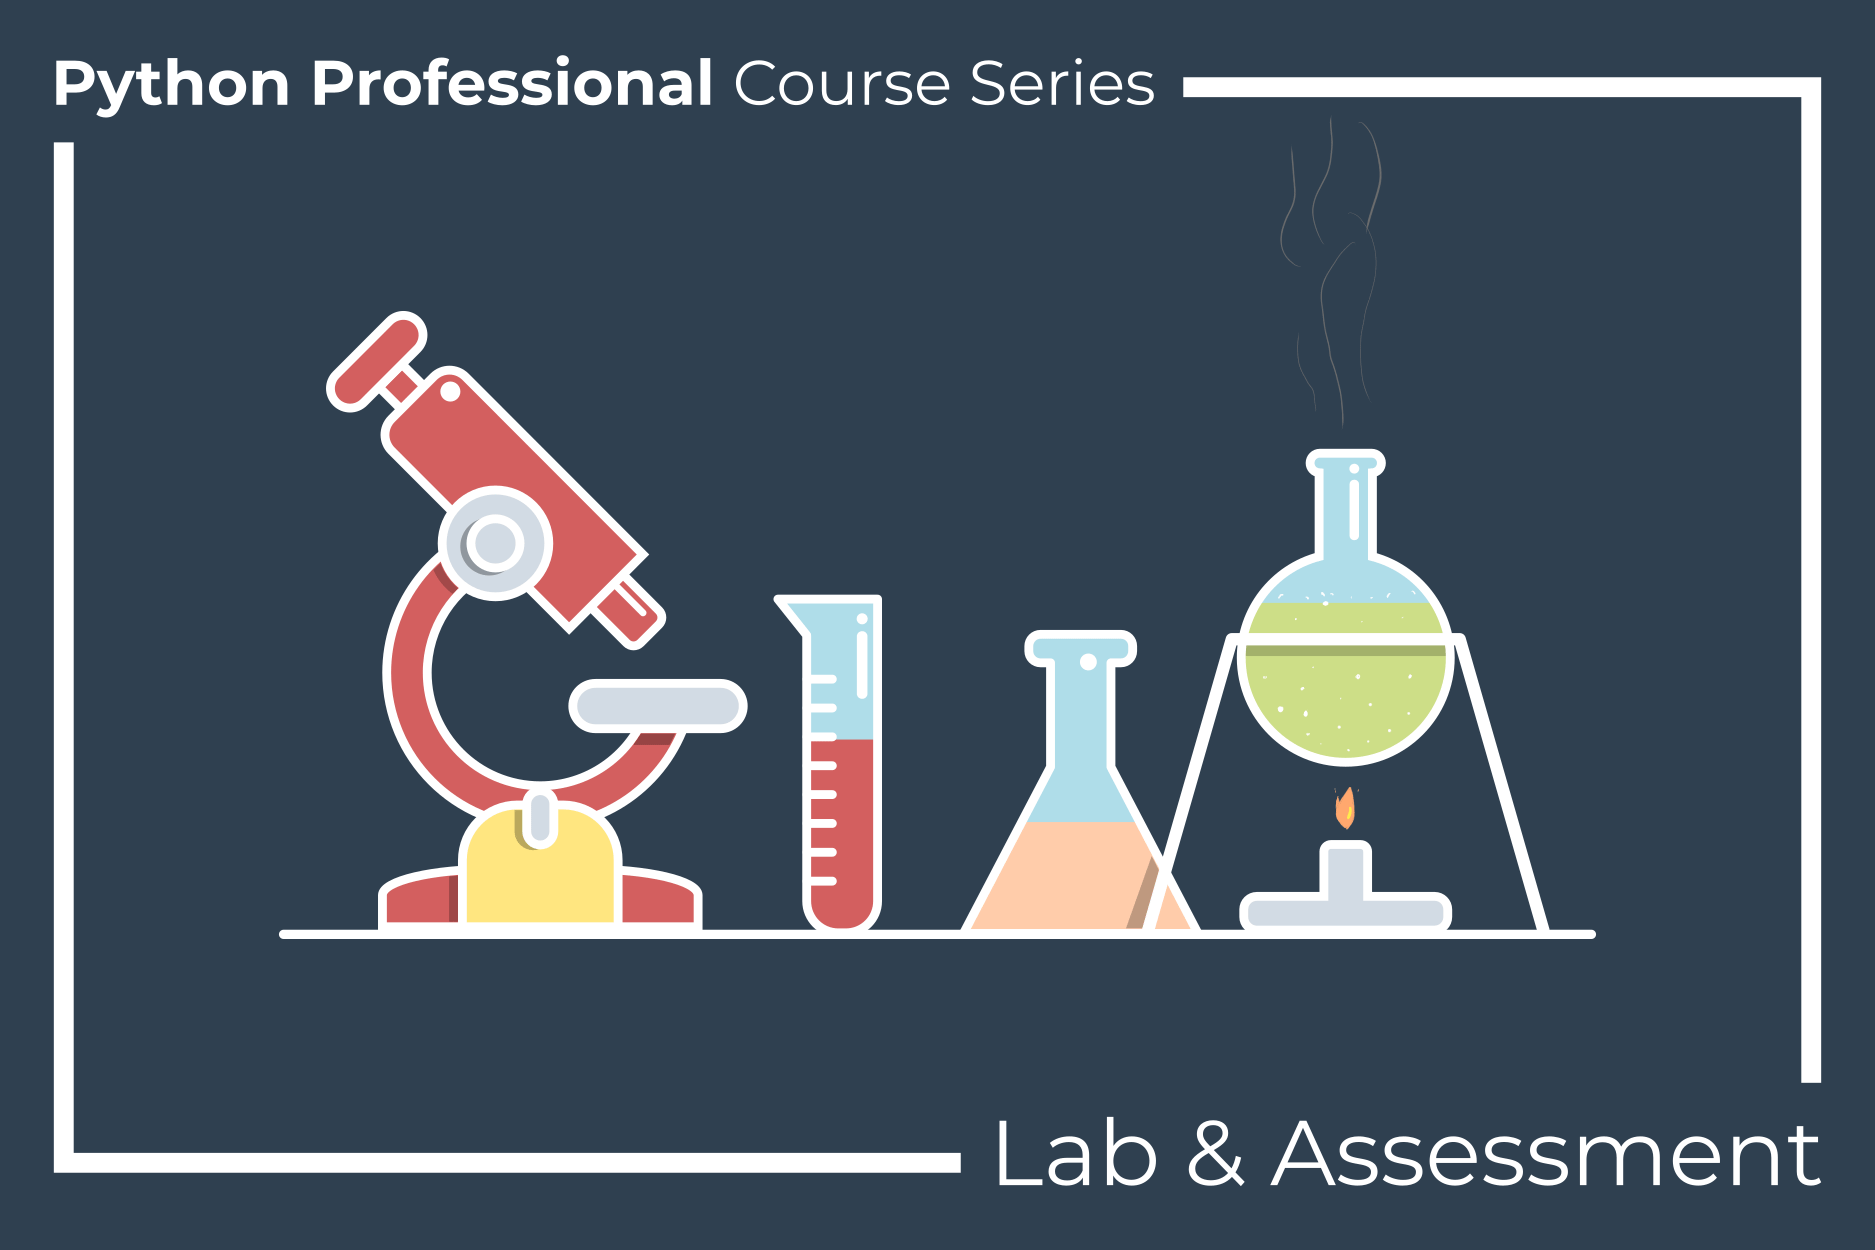

##Lab - Simple Command Line Interface
###Scenario
We want you to write a simple CLI (Command Line Interface) tool which can be used in order to diagnose the current status of a particular http server. The tool should accept one or two command line arguments:

1. (obligatory) the address (IP or qualified domain name) of the server to be diagnosed (the diagnosis will be extremely simple, we just want to know if the server is dead or alive)
2. (optional) the server's port number (any absence of the argument means that the tool should use port 80)
3. use the **HEAD** method instead of **GET** — it forces the server to send the full response header but without any content; it's enough to check if the server is working properly; the rest of the request remains the same as for **GET**.

We also assume that:

* the tool checks if it is invoked properly, and when the invocation lacks any arguments, the tool prints an error message and returns an exit code equal to 1;
* if there are two arguments in the invocation line and the second one is not an integer number in the range 1..65535, the tool prints an error message and returns an exit code equal to 2;
* if the tool experiences a timeout during connection, an error message is printed and 3 is returned as the exit code;
* if the connection fails due to any other reason, an error message appears and 4 is returned as the exit code;
* if the connection succeeds, the very first line of the server’s response is printed.

Hints:

* to access command line arguments, use the **argv** variable from the **sys** module; its length is always one more than the actual number of arguments, as **argv[0]** stores your script's name; this means that the first argument is at **argv[1]** and the second at **argv[2]**; don't forget that the command line arguments are always strings!
* returning an exit code equal to n can be achieved by invoking the **exit(n)** function.

Assuming that the tool is placed in a source file name **sitechecker.py**, here are some real-use cases:

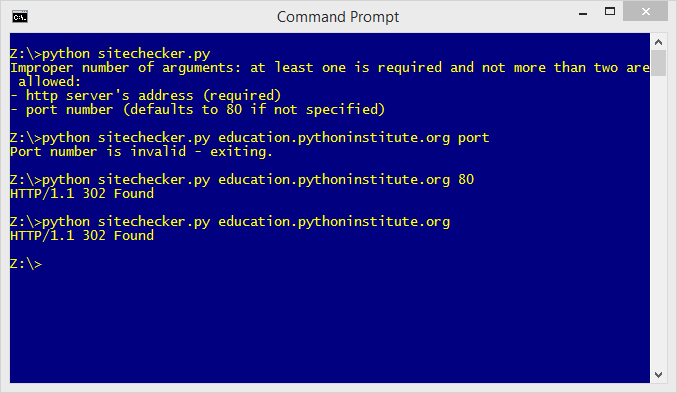

In [ ]:
import sys
import socket

if len(sys.argv) not in [2, 3]:
    print("Improper number of arguments: at least one is required" +
          "and not more than two are allowed:")
    print("- http server's address (required)")
    print("- port number (defaults to 80 if not specified)")
    exit(1)

addr = sys.argv[1]
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
if len(sys.argv) == 3:
    try:
        port = int(sys.argv[2])
        if not (1 <= port <= 65535):
            raise ValueError
    except ValueError:
        print("Port number is invalid - exiting.")
        exit(2)
else:
    port = 80

try:
    sock.connect((addr, port))
except socket.timeout:
    print("The server" + addr + "seems to be dead - sorry.")
    exit(3)
except socket.gaierror:
    print("Server address" + addr + "is invalid or malformed - sorry.")
    exit(4)

request = b"HEAD / HTTP/1.0\r\nHost: " + \
          bytes(addr, "utf8") + \
          b"\r\nConnection:close\r\n\r\n"

sock.send(request)
answer = sock.recv(100).decode("utf8")
sock.shutdown(socket.SHUT_RDWR)
sock.close()
print(answer[:answer.find('\r')])

##Lab - Vehicle data decoder/encoder
###Scenario
Take a look at these two screenshots. They present two different use cases of the same program:

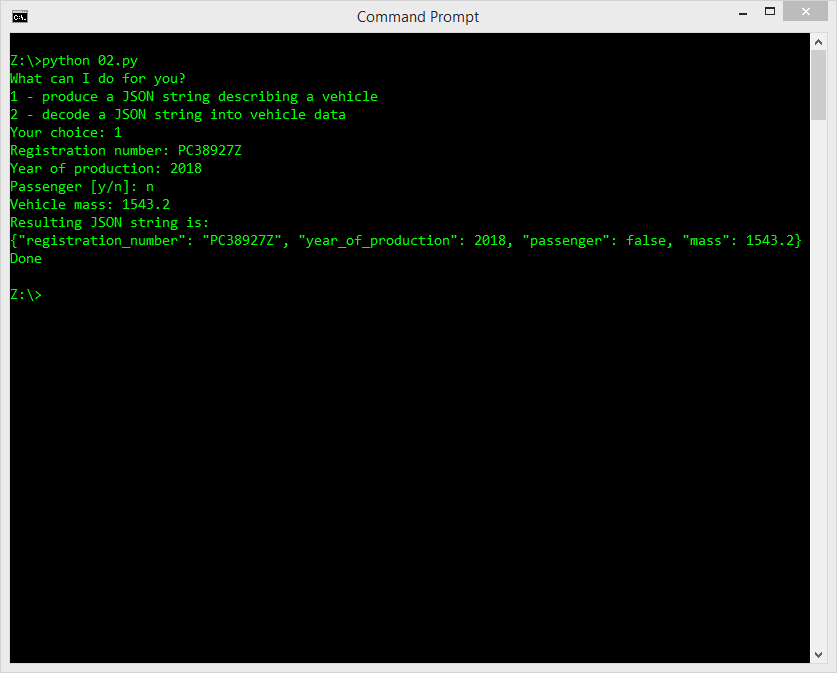

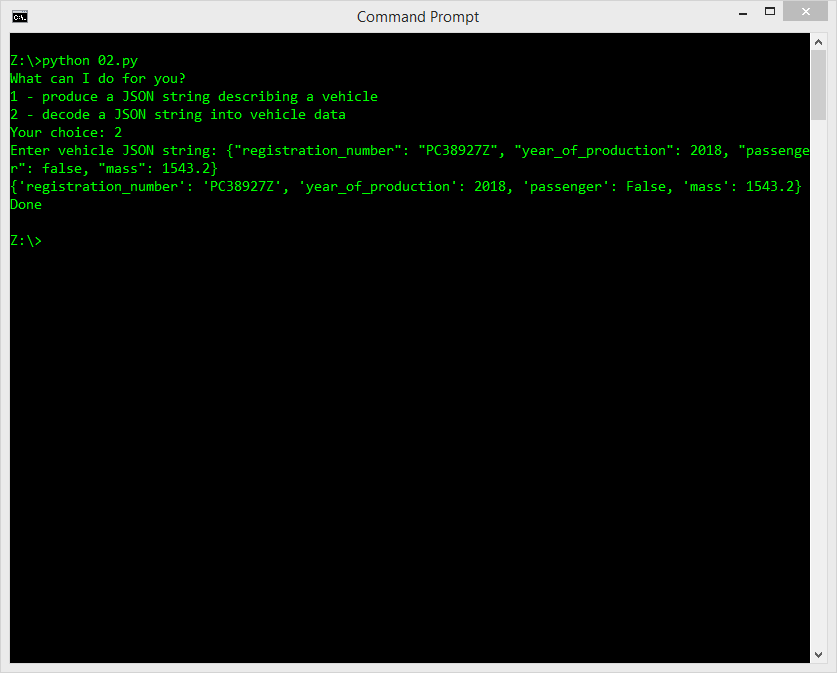

Your task is to write a code which has exactly the same conversation with the user and:

1. defines a class named **Vehicle**, whose objects can carry the vehicle data shown above (the structure of the class should be deducted from the above dialog — call it "reverse engineering" if you want)
2. defines a class able to encode the Vehicle object into an equivalent JSON string;
3. defines a class able to decode the JSON string into the newly created Vehicle object.
Of course, some basic data validity checks should be done, too. We're sure you are careful enough to pretect your code from reckless user.

In [ ]:
import json


class Vehicle:
    def __init__(self, registration_number, year_of_production, passenger, mass):
        self.registration_number = registration_number
        self.year_of_production = year_of_production
        self.passenger = passenger
        self.mass = mass


class MyEncoder(json.JSONEncoder):
    def default(self, veh):
        if isinstance(veh, Vehicle):
            return veh.__dict__
        else:
            return super().default(self, veh)


class MyDecoder(json.JSONDecoder):
    def __init__(self):
        json.JSONDecoder.__init__(self, object_hook=self.decode_vehicle)

    def decode_vehicle(self, veh):
        return Vehicle(**veh)


print("What can I do for you?")
print("1 - produce a JSON string describing a vehicle")
print("2 - decode a JSON string into vehicle data")
answer = ''
while answer not in ['1', '2']:
    answer = input("Your choice: ")
if answer == '1':
    rn = input("Registration number: ")
    yop = int(input("Year of production: "))
    psg = input("Passenger [y/n]: ").upper() == 'Y'
    mss = float(input("Vehicle mass: "))
    vehicle = Vehicle(rn, yop, psg, mss)
    print("Resulting JSON string is:")
    print(json.dumps(vehicle, cls=MyEncoder))
else:
    json_str = input("Enter vehicle JSON string: ")
    try:
        new_car = json.loads(json_str, cls=MyDecoder)
        print(new_car.__dict__)
    except TypeError:
        print("The JSON string doesn't describe a valid vehicle")
print("Done")


##Lab -  New York Stock Exchange
###Scenario
Download and open the following XML file in your favorite text editor:

[nyse.xml](https://edube.org/files/download/936)

It's a small excerpt of the New York Stock Exchange quotes list. Take a look at it and analyze its structure. You need to do this as your task is to write a code which reads the data and presents it in a form similar to this one:

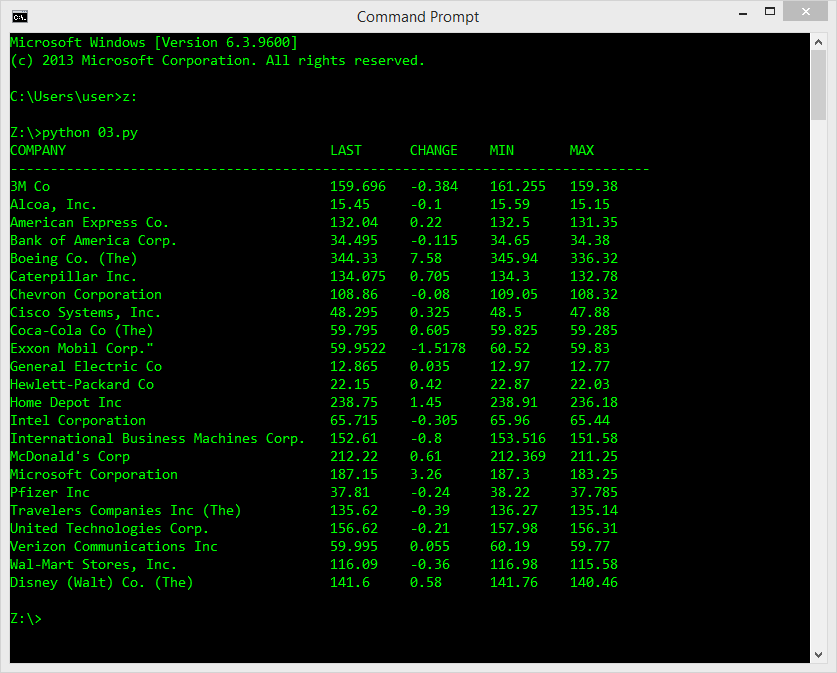

Hints:

1. don't forget to handle at least two possible exceptions: **FileNotFoundError** and **xml.etree.ElementTree.ParseError**;
2. feel free to improve and beautify the output — we know perfectly well that ours is not very sophisticated and rather ugly.

In [ ]:
import xml.etree.ElementTree

try:
    NYSE = xml.etree.ElementTree.parse('nyse.xml')
except FileNotFoundError:
    print("Stock data file not found")
    exit(1)
except xml.etree.ElementTree.ParseError:
    print("Stock data file contains invalid data")
    exit(2)
quotes = NYSE.getroot()
print('COMPANY'.ljust(40), end='')
print('LAST'.ljust(10), end='')
print('CHANGE'.ljust(10), end='')
print('MIN'.ljust(10), end='')
print('MAX'.ljust(10), end='')
print()
print('-' * 80)
for quote in quotes.findall('quote'):
    print(quote.text.ljust(40), end='')
    print(quote.attrib['last'].ljust(10), end='')
    print(quote.attrib['change'].ljust(10), end='')
    print(quote.attrib['min'].ljust(10), end='')
    print(quote.attrib['max'].ljust(10), end='')
    print()


##Lab - Server checker once again
###Scenario
Now we want to you to return to the issues discussed in lab #1. In fact, you need to implement exactly the same functionality as you embedded in your code previously, but this time you have to use the **requests** module instead of the **socket** module. Everything else should remain the same: the command line arguments and outputs have to be indistinguishable.

Hint: use the **head()** method instead of **get()**, as you don't need the whole root document the server sends to you — the header is enough to test whether or not the server is responding. Fortunately, **head()** has exactly the same interface as **get()**. Don't forget to handle all needed exceptions — don't leave your user without any clear explanations about anything that went wrong.



In [ ]:
import sys
import requests

if len(sys.argv) not in [2, 3]:
    print("Improper number of arguments: at least one is required " +
          "and not more than two are allowed:")
    print("- http server's address (required)")
    print("- port number (defaults to 80 if not specified)")
    exit(1)

addr = sys.argv[1]
URI = 'http://' + sys.argv[1]
if len(sys.argv) == 3:
    try:
        port = int(sys.argv[2])
        if not (1 <= port <= 65535):
            raise ValueError
    except ValueError:
        print("Port number is invalid - exiting.")
        exit(2)
    URI += ':' + str(port)
URI += '/'

try:
    response = requests.head(URI)
except requests.exceptions.InvalidURL:
    print("The given URL '" + sys.argv[1] + "' is invalid.")
    exit(3)
except requests.exceptions.ConnectionError:
    print("Cannot connect to '" + addr + "'.")
    exit(4)
except requests.exceptions.RequestException:
    print("Some problems appeared - sorry.")
    exit(5)

print(response.status_code,  response.reason)


#2.2 Project - Vintage cars database

##Scenario
Your client has asked if you are able to write and deploy a software solution managing a small database that gathers data about vintage cars. Of course you are! It's a piece of cake for a programmer like you.

To be honest, all the blocks needed to construct such an application are already at your fingertips. Your task is to integrate them into one cooperating product.

Of course, you have to be more careful than us — our examples don’t need to be aware of some fatal events, but your product does.

We've provided the skeleton of the application in the editor. You don't have to follow the exact same trail as we suggest, but we’re convinced that it may help you to master the whole code, and to implement it in a number of small steps.

Don't forget to keep the server running when you start to run and debug your code!

Look carefully at the following terminal session — it will help you guess your client's needs. Of course, you can do it better and solve some issues in a smarter way than we have — feel free to experiment, but don’t lose sight of user satisfaction. This is the most valuable criteria of software usability.

```
+-----------------------------------+
|       Vintage Cars Database       |
+-----------------------------------+
M E N U
=======
1. List cars
2. Add new car
3. Delete car
4. Update car
0. Exit
Enter your choice (0..4): 1
*** Database is empty ***
+-----------------------------------+
|       Vintage Cars Database       |
+-----------------------------------+
M E N U
=======
1. List cars
2. Add new car
3. Delete car
4. Update car
0. Exit
Enter your choice (0..4): 2
Car ID (empty string to exit): 1
Car brand (empty string to exit): Porsche
Car model (empty string to exit): 911
Car production year (empty string to exit): 1963
Is this car convertible? [y/n] (empty string to exit): n
+-----------------------------------+
|       Vintage Cars Database       |
+-----------------------------------+
M E N U
=======
1. List cars
2. Add new car
3. Delete car
4. Update car
0. Exit
Enter your choice (0..4): 2
Car ID (empty string to exit): 2
Car brand (empty string to exit): Ford
Car model (empty string to exit): Mustang
Car production year (empty string to exit): 1972
Is this car convertible? [y/n] (empty string to exit): y
+-----------------------------------+
|       Vintage Cars Database       |
+-----------------------------------+
M E N U
=======
1. List cars
2. Add new car
3. Delete car
4. Update car
0. Exit
Enter your choice (0..4): 1
id        | brand          | model     | production_year     | convertible    |
1         | Porsche        | 911       | 1963                | False          |
2         | Ford           | Mustang   | 1972                | True           |

+-----------------------------------+
|       Vintage Cars Database       |
+-----------------------------------+
M E N U
=======
1. List cars
2. Add new car
3. Delete car
4. Update car
0. Exit
Enter your choice (0..4):  4
Car ID (empty string to exit): 2
Car brand (empty string to exit): Ford
Car model (empty string to exit): Mustang
Car production year (empty string to exit): 1973
Is this car convertible? [y/n] (empty string to exit): n
+-----------------------------------+
|       Vintage Cars Database       |
+-----------------------------------+
M E N U
=======
1. List cars
2. Add new car
3. Delete car
4. Update car
0. Exit
Enter your choice (0..4): 3
Car ID (empty string to exit): 1
Success!
Car ID (empty string to exit):
+-----------------------------------+
|       Vintage Cars Database       |
+-----------------------------------+
M E N U
=======
1. List cars
2. Add new car
3. Delete car
4. Update car
0. Exit
Enter your choice (0..4): 0
Bye~
```

In [ ]:
import requests
import json


Service_URI = 'http://localhost:3000/cars/'
h_close = {'Connection': 'Close'}
h_content = {'Content-Type': 'application/json'}
column_headers = ["id", "brand", "model", "production_year", "convertible"]
column_witdhs = [10, 15, 10, 20, 15]


def check_server(cid=None):
    uri = Service_URI
    if cid:
        uri += str(cid)
    try:
        res = requests.head(uri, headers=h_close)
    except requests.exceptions.RequestException:
        return False
    return res.status_code == requests.codes.ok


def print_menu():
    print("+-----------------------------------+")
    print("|       Vintage Cars Database       |")
    print("+-----------------------------------+")
    print("M E N U")
    print("=======")
    print("1. List cars")
    print("2. Add new car")
    print("3. Delete car")
    print("4. Update car")
    print("0. Exit")


def read_user_choice():
    ok = False
    while not ok:
        answer = input("Enter your choice (0..4): ")
        ok = answer in ['0', '1', '2', '3', '4']
        if ok:
            return answer
        print("Bad choice!")


def print_header():
    for (head, width) in zip(column_headers, column_witdhs):
        print(head.ljust(width), end='| ')
    print()


def print_car(car):
    for (name, width) in zip(column_headers, column_witdhs):
        print(str(car[name]).ljust(width), end='| ')
    print()


def list_cars():
    try:
        res = requests.get(Service_URI)
    except requests.exceptions.RequestException:
        print("Communication error :(")
        return
    cars = res.json()
    if len(cars) == 0:
        print("*** Database is empty ***")
        return
    print_header()
    for car in cars:
        print_car((car))
    print()


def name_is_valid(name):
    for char in name:
        if not (char.isspace() or char.isdigit() or char.isalpha()):
            return False
    return True


def enter_id():
    while True:
        id = input("Car ID (empty string to exit): ")
        if not id or id.isspace():
            return None
        if not id.isdigit():
            print("Invalid ID - re-enter.")
            continue
        return int(id)


def enter_production_year():
    while True:
        prod_year = input("Car production year (empty string to exit): ")
        if not prod_year or prod_year.isspace():
            return None
        if not prod_year.isdigit() or not (1900 <= int(prod_year) <= 2000):
            print("Invalid production year - re-enter.")
            continue
        return int(prod_year)


def enter_name(what):
    while True:
        name = input("Car " + what + " (empty string to exit): ")
        if name == '' or name.isspace():
            return None
        if not name_is_valid(name):
            print(what.title() + ' contains illegal characters - re-enter.')
            continue
        return name.title()


def enter_convertible():
    while True:
        conv = input("Is this car convertible? [y/n] (empty string to exit): ")
        if conv == '':
            return None
        if conv.upper() not in ['Y', 'N']:
            print("Invalid input - re-enter.")
            continue
        return conv in ['y', 'Y']


def delete_car():
    while True:
        id = enter_id()
        if not id:
            return
        try:
            res = requests.delete(Service_URI + str(id))
        except requests.exceptions.RequestException:
            print('Communication error - delete failed.')
            return
        if res.status_code == requests.codes.not_found:
            print("Unknown ID - nothing has been deleted")
            continue
        print("Success!")


def input_car_data(with_id):
    if with_id:
        car_id = enter_id()
        if car_id is None:
            return {}
    else:
        car_id = 0
    brand = enter_name('brand')
    if brand is None:
        return {}
    model = enter_name('model')
    if model is None:
        return {}
    prod_year = enter_production_year()
    if prod_year is None:
        return {}
    conv = enter_convertible()
    if conv is None:
        return {}
    return {'id': car_id, 'brand': brand, 'model': model, 'production_year': prod_year, 'convertible': conv}


def add_car():
    new_car = input_car_data(True)
    if not new_car:
        return
    try:
        res = requests.post(Service_URI, headers=h_content, data=json.dumps(new_car))
    except requests.exceptions.RequestException:
        print('Communication error - adding new car failed')
        return
    if res.status_code != 201:
        print("Duplicated car ID - adding new car failed")


def update_car():
    while True:
        car_id = enter_id()
        if not car_id:
            return
        if not check_server(car_id):
            print("Car ID not found in the database.")
        else:
            break
    car = input_car_data(False)
    if not car:
        return

    car["id"] = car_id
    try:
        res = requests.put(Service_URI + str(car_id), headers=h_content, data=json.dumps(car))
    except requests.exceptions.RequestException:
        print('Communication error - updating car data failed')
        return
    if res.status_code != requests.codes.ok:
        print("Duplicated car ID - adding new car failed")


while True:
    if not check_server():
        print("Server is not responding - quitting!")
        exit(1)
    print_menu()
    choice = read_user_choice()
    if choice == '0':
        print("Bye!")
        exit(0)
    elif choice == '1':
        list_cars()
    elif choice == '2':
        add_car()
    elif choice == '3':
        delete_car()
    elif choice == '4':
        update_car()
